# <h2 style='text-align:center;font-size:80px;background-color:pink;border:80px;color:white'> Global Power Plant Report. <h2>

# Description:

##### The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.



# Key attributes of the database:

### The database includes the following indicators:

### In this dataset we need to make two predictions
 . Fuel Type

 . capacity_mw


### Here fuel type is Primary Fuel

 . capacity_mw (number): electrical generating capacity in megawatts ,so this is regression problem and we will go 1st with capacity_mw
 

. Fuel Type (Primary Fuel) : It is a classification problem and we will do it after doing Regression

In [1]:
import pandas as pd 
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now lets Load the dataset

df=pd.read_csv('global_power_plant.csv')
pd.set_option("display.max_columns",None)

df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

#### There are 907 rows and 27 columns in dataset

In [4]:
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sample(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
358,IND,India,KONASEEMA CCCP,IND0000205,445.0,16.7346,81.8622,Gas,NaN,NaN,NaN,2009.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,0.00000,0.0000,0.00000,NaN,0.0000,NaN,Central Electricity Authority,NaN
66,IND,India,BASSI,IND0000042,66.0,31.9546,76.7986,Hydro,NaN,NaN,NaN,1973.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,293.53495,314.3205,296.27120,313.59415,250.3022,NaN,Central Electricity Authority,NaN
590,IND,India,POCHAMPAD,IND0000339,36.0,18.9766,78.2563,Hydro,NaN,NaN,NaN,1987.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,12.80565,0.0000,74.91355,35.51155,31.5415,NaN,Central Electricity Authority,NaN


#### There are columns that have Nan which we will treat later

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#### There are columns that are object and float64.. Target variable is float64

# -----------------------------------  --------------------------------

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:black'> EDA <h2>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### So many columns have a lot have NaN values which needs to be treated... 

# Checking Null Value

In [10]:
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True


In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

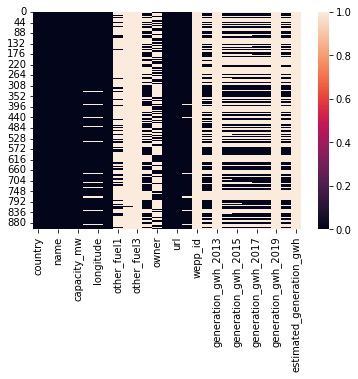

In [12]:
sns.heatmap(df.isnull())

#### A Lot of Missing value.. Lets fill it

In [13]:
# Filling the missing values using Fillna method and using mean , median and mode accordingly as per the columns reqirement
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["owner"] = df["owner"].fillna(df["owner"].mode()[0])
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["year_of_capacity_data"] = df["year_of_capacity_data"].fillna(df["year_of_capacity_data"].median())
df["generation_data_source"] = df["generation_data_source"].fillna(df["generation_data_source"].mode()[0])

# Here i am not filling nan in other fuel 2 and other fuel 3 because 100% of the data are null and irrelevent to fill

# Here i am not filling nan in wep id generation_gwh_2013  and generation_gwh_2019  and estimated_generation_gwh  because 100% of the data are null and irrelevent to fill


In [14]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 906
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     907
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

#### Some columns have all nan which is irrelavant so will be dropping this

In [15]:
# Dropping irrelevant columns
df.drop(columns=["other_fuel2","other_fuel3","wepp_id","estimated_generation_gwh","generation_gwh_2013","generation_gwh_2019"], axis=1, inplace=True)


In [16]:
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.20545,817.97725,751.644375,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,801.123775,711.181225,737.20545,817.97725,751.644375,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,801.123775,711.181225,737.20545,817.97725,751.644375,Central Electricity Authority


In [17]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

#### Now all NaN value have been removed

<AxesSubplot:>

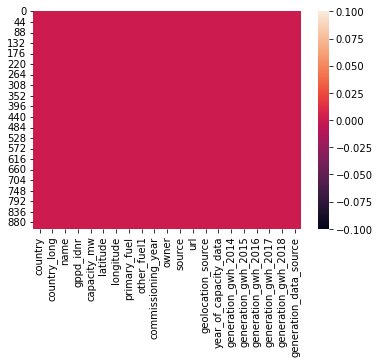

In [18]:
sns.heatmap(df.isnull())

#### No Nan value.. presented graphically

In [19]:
df['country'].unique()

array(['IND'], dtype=object)

#### All Power Plant are from India (IND)

In [20]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

##### All data is of India Power Plant

In [21]:
df.drop(columns=["country",'country_long'],axis=1,inplace=True)


#### Dropped this column because i know all power plant data is Of `India`

In [22]:
df.nunique()

name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
dtype: int64

In [23]:
#### drop alert as few columns are not important
df.drop("owner",axis=1,inplace=True)

In [24]:
df.drop("url",axis=1,inplace=True)

In [25]:
# character Indentifier of power plant is alsonot a necessary column

df.drop("gppd_idnr",axis=1,inplace=True)

In [26]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [27]:
df.shape

(907, 16)

In [28]:
#  Lets Remove Duplicates Values from the dataframe if present

df.drop_duplicates(keep='first',inplace=True)

In [29]:
df.shape

(907, 16)

#### So there was no duplicate values in dataset

In [30]:
# Checking wheather target variable contains any space
df.loc[df['capacity_mw']==" "]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source


#### Target variable does not contains anys space

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:black'> Univariate Analysis <h2>

In [31]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

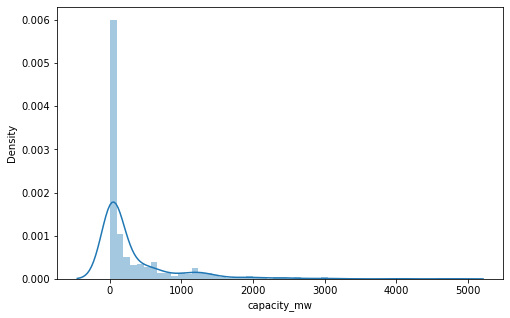

In [32]:
plt.figure(figsize=(8,5))
sns.distplot(df['capacity_mw'])

##### Target variable is left skewed

<AxesSubplot:xlabel='latitude', ylabel='Density'>

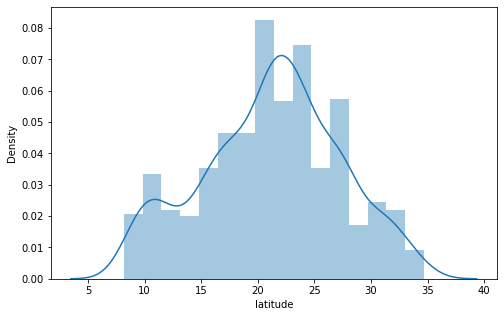

In [33]:
plt.figure(figsize=(8,5))
sns.distplot(df['latitude'])

##### latitude is also skewed

<AxesSubplot:xlabel='longitude', ylabel='Density'>

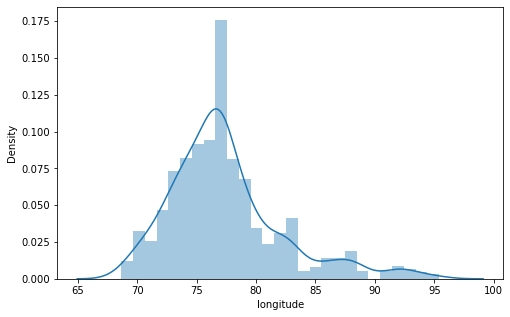

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(df['longitude'])

##### longitude is also skewed

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

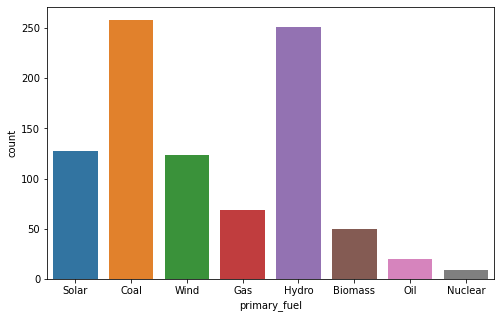

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df['primary_fuel'])

#### Here we have maximum of coal and hydro primary_fuel and minimum of Nuclear and Oil primary_fuel

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

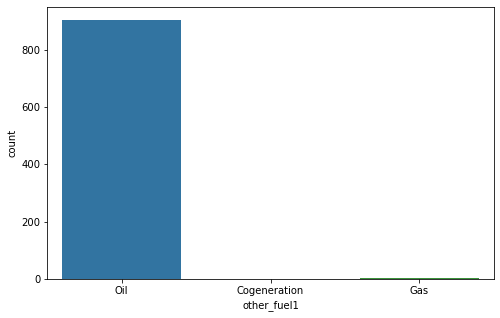

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(df['other_fuel1'])

#### Other fuel1 used in power plant is maximum of Oil and least of Gas

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

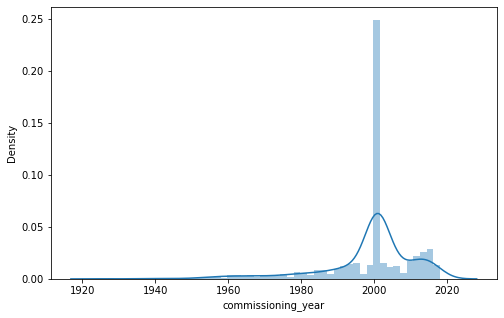

In [37]:
plt.figure(figsize=(8,5))
sns.distplot(df['commissioning_year'])

#### commissing_year is skewed and sems like most of power plant commissing year was around 2000

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

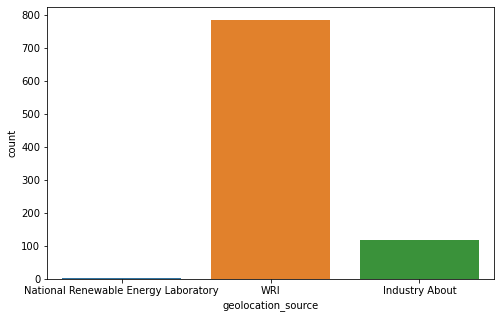

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(df['geolocation_source'])

##### the maximum attribution of geolocation information is from WRI geolocation source and least is from National Renewable laboratory

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

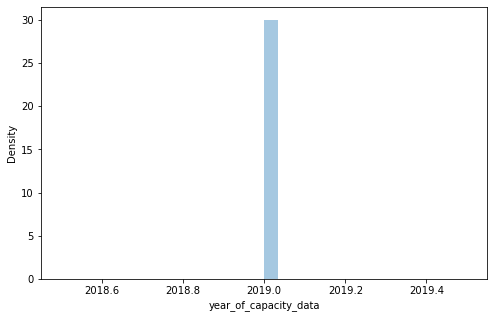

In [39]:
plt.figure(figsize=(8,5))
sns.distplot(df['year_of_capacity_data'])

#### Year when capacity information was recorded was 2019

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

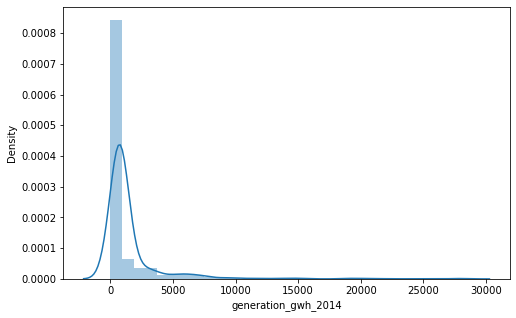

In [40]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2014'])

In [41]:
df['generation_gwh_2014'].mean()

1516.6899563099648

#### electricity generation in gigawatt-hours reported for the year 2014 was 1516.6

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

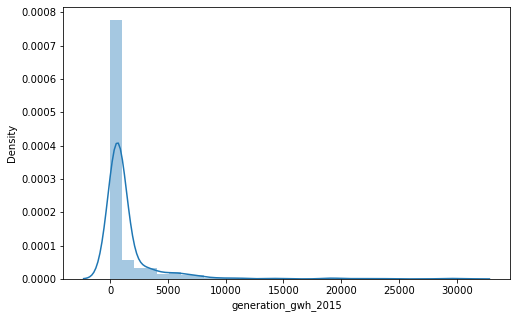

In [42]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2015'])

In [43]:
df['generation_gwh_2015'].mean()

1510.0712958331865

#### electricity generation in gigawatt-hours reported for the year 2015 was 1510

1565.3613831285058

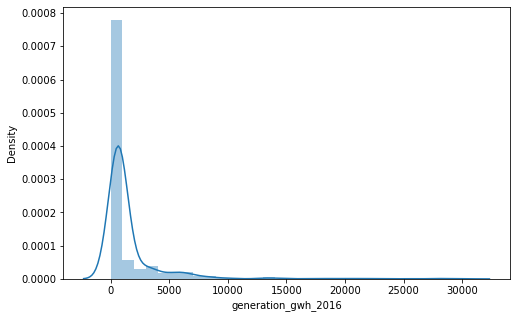

In [44]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2016'])
df['generation_gwh_2016'].mean()

#### electricity generation in gigawatt-hours reported for the year 2016 was 1565

1657.1217968406709

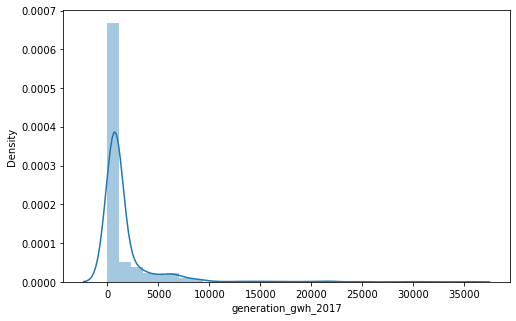

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2017'])
df['generation_gwh_2017'].mean()

#### electricity generation in gigawatt-hours reported for the year 2017 was 1657

1665.0110301274244

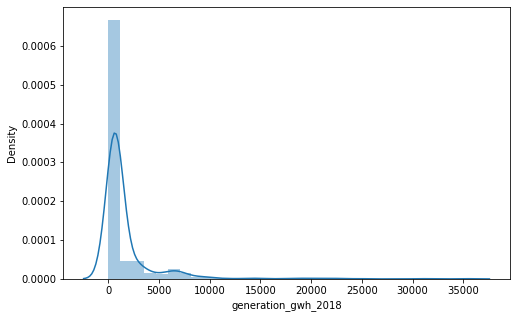

In [46]:
plt.figure(figsize=(8,5))
sns.distplot(df['generation_gwh_2018'])
df['generation_gwh_2018'].mean()

#### electricity generation in gigawatt-hours reported for the year 2018 was 1665

### Max electricity generation was in 2018

array(['Central Electricity Authority'], dtype=object)

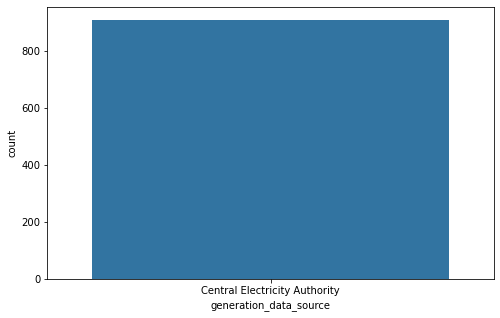

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(df['generation_data_source'])
df['generation_data_source'].unique()

#### attribution for the reported generation information is from Central Electricity Authority

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:black'> Bivariate Analysis <h2>

In [48]:
df.columns

Index(['name', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

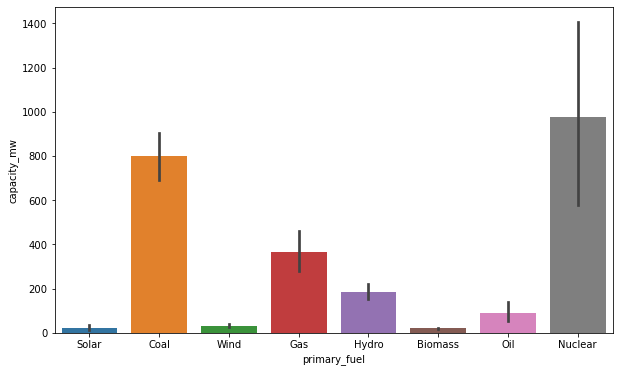

In [49]:
#Lets check the relation between primary Fuel and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

#### The maximum megawatt of electricity can be produced by Nuclear followed by Coal and the least is Biomass ,solar and wind

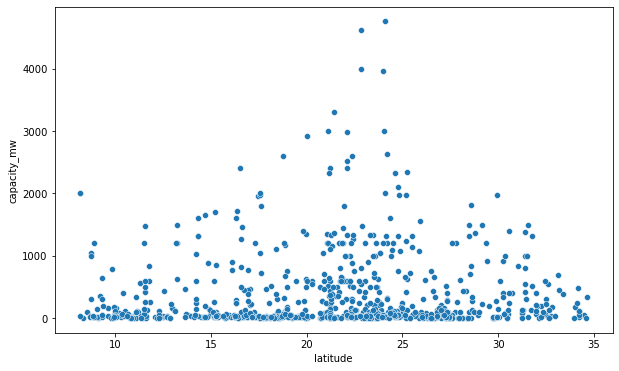

In [50]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "latitude", y = "capacity_mw", data = df)
plt.show()

#### We can see that at latitude 16 to 28 capacity of magawatt seem to be the highest

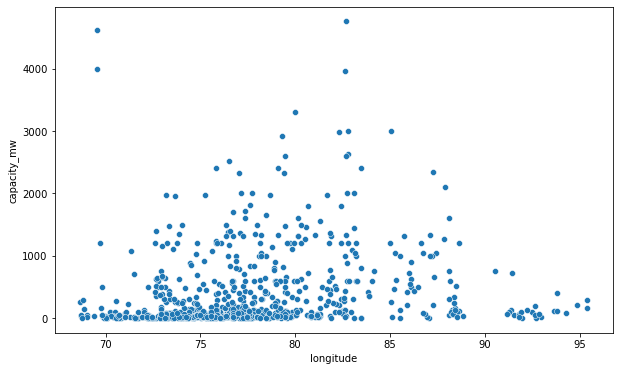

In [51]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "longitude", y = "capacity_mw", data = df)
plt.show()

#### We can see that at longitude 75 to 83 capacity of magawatt seem to be the highest

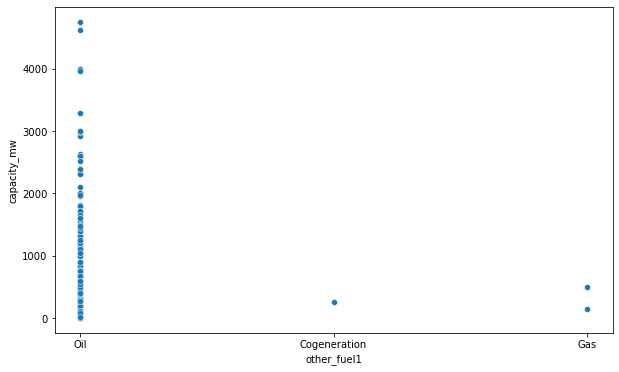

In [52]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "other_fuel1", y = "capacity_mw", data = df)
plt.show()

##### We can see that in case of other fuel -Oil has the maximum capacity of producing electricity in megawatt and the least is congenration

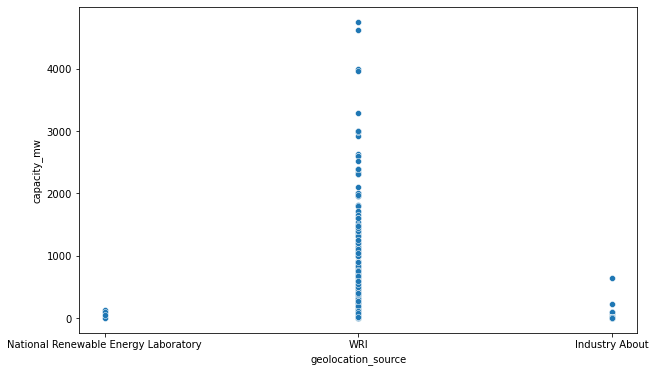

In [53]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

##### Maximum meghawatt is produced by WRI

Max Genration -> 28127.0
Min Genration -> 0.0
Average Genration -> 1516.6899563099648


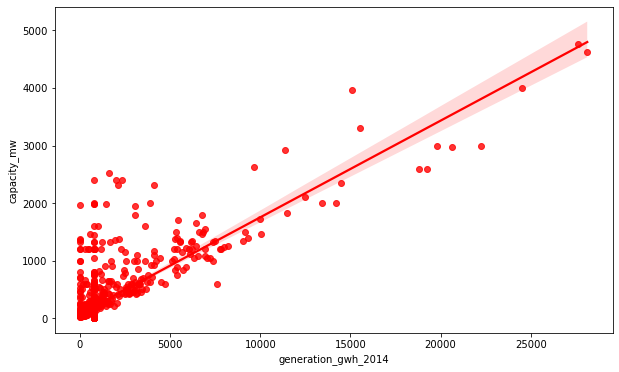

In [54]:
plt.figure(figsize = (10,6))
sns.regplot(x = "generation_gwh_2014", y = "capacity_mw",color="red", data = df)
print ('Max Genration ->' ,df['generation_gwh_2014'].max())
print ('Min Genration ->' ,df['generation_gwh_2014'].min())
print ('Average Genration ->' ,df['generation_gwh_2014'].mean())


plt.show()

##### Max electricity generation in 2014 was 28127.. average generation was 1516.. generation_gwh has linear relation with target variable capacity_mw

Max Genration -> 30539.0
Min Genration -> 0.0
Average Genration -> 1510.0712958331865


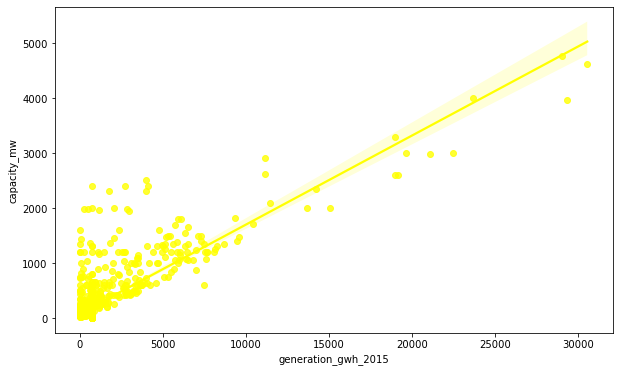

In [55]:
plt.figure(figsize = (10,6))
sns.regplot(x = "generation_gwh_2015", y = "capacity_mw",color="yellow", data = df)
print ('Max Genration ->' ,df['generation_gwh_2015'].max())
print ('Min Genration ->' ,df['generation_gwh_2015'].min())
print ('Average Genration ->' ,df['generation_gwh_2015'].mean())


plt.show()

##### Max electricity generation in 2015 was 30539.. average generation was 1510.. generation_gwh2015 has linear relation with target variable capacity_mw

Max Genration -> 30015.0
Min Genration -> 0.0
Average Genration -> 1565.3613831285058


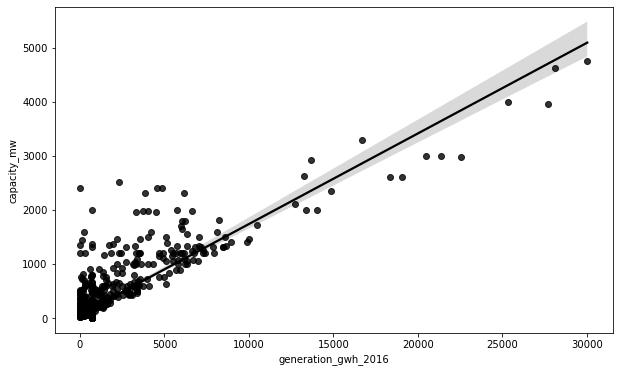

In [56]:
plt.figure(figsize = (10,6))
sns.regplot(x = "generation_gwh_2016", y = "capacity_mw",color="black", data = df)
print ('Max Genration ->' ,df['generation_gwh_2016'].max())
print ('Min Genration ->' ,df['generation_gwh_2016'].min())
print ('Average Genration ->' ,df['generation_gwh_2016'].mean())


plt.show()

#### Max electricity generation in 2016 was 30015.. average generation was 1565.. generation_gwh2016 has linear relation with target variable capacity_mw

Max Genration -> 35116.0
Min Genration -> 0.0
Average Genration -> 1657.1217968406709


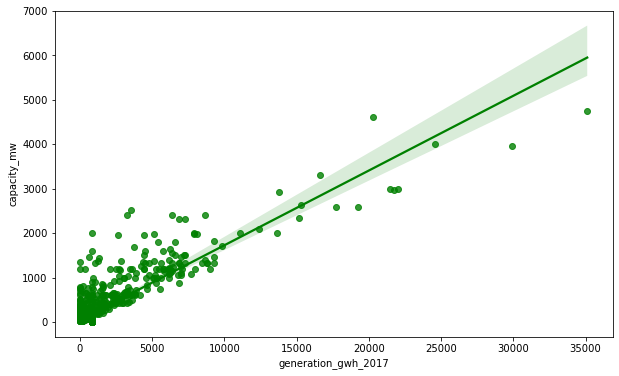

In [57]:
plt.figure(figsize = (10,6))
sns.regplot(x = "generation_gwh_2017", y = "capacity_mw",color="green", data = df)
print ('Max Genration ->' ,df['generation_gwh_2017'].max())
print ('Min Genration ->' ,df['generation_gwh_2017'].min())
print ('Average Genration ->' ,df['generation_gwh_2017'].mean())


plt.show()

##### Max electricity generation in 2017 was 35116.. average generation was 1657.. generation_gwh2017 has linear relation with target variable capacity_mw

Max Genration -> 35136.0
Min Genration -> 0.0
Average Genration -> 1665.0110301274244


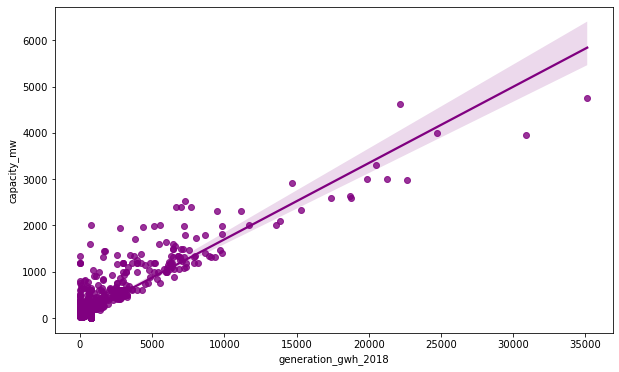

In [58]:
plt.figure(figsize = (10,6))
sns.regplot(x = "generation_gwh_2018", y = "capacity_mw",color="purple", data = df)
print ('Max Genration ->' ,df['generation_gwh_2018'].max())
print ('Min Genration ->' ,df['generation_gwh_2018'].min())
print ('Average Genration ->' ,df['generation_gwh_2018'].mean())


plt.show()

###### Max electricity generation in 2018 was 35116.. average generation was 1665.. generation_gwh2018 has linear relation with target variable capacity_mw

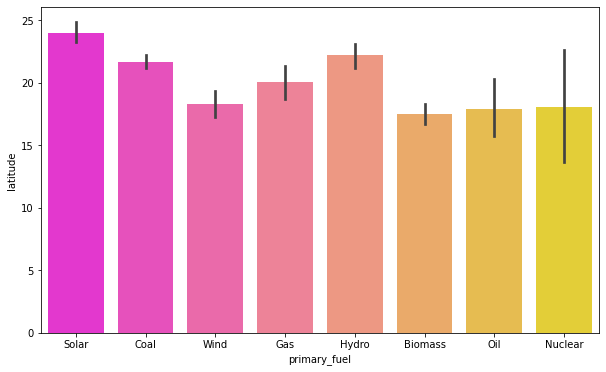

In [59]:
plt.figure(figsize = (10,6))
sns.barplot(x = "primary_fuel", y = "latitude", data = df,palette="spring")
plt.show()

##### The Primary fuel Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude

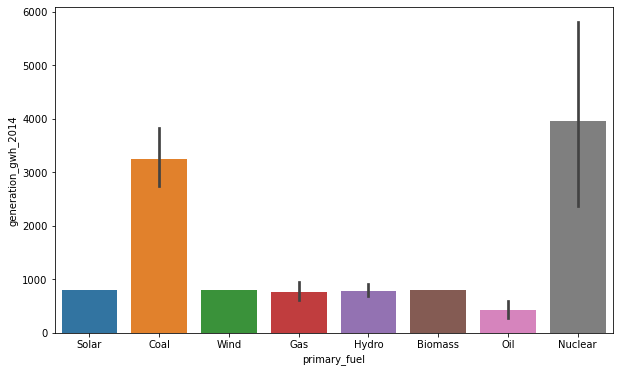

In [60]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)
plt.show()

##### Here we can see that the maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2014 ..

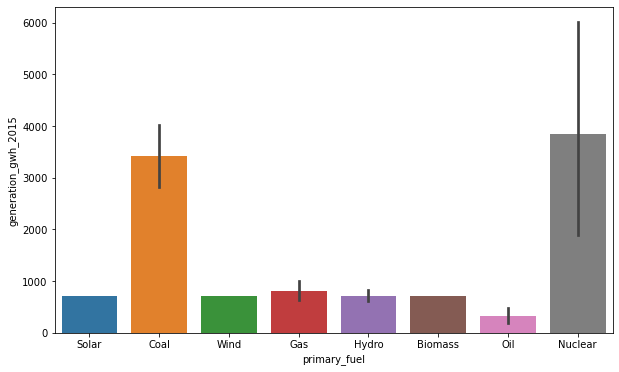

In [61]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)
plt.show()

#### Here we can see that the maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2015 ..

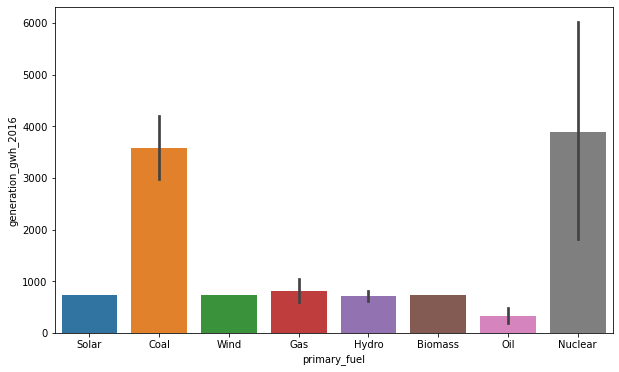

In [62]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df)
plt.show()

#### Here we can see that the maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2016 ..

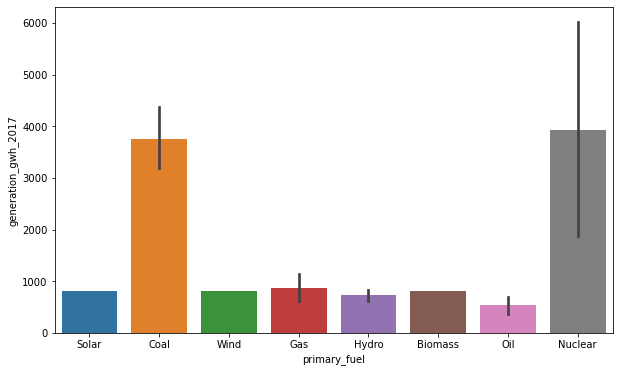

In [63]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df)
plt.show()

##### Here we can see that the maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2017 ..but Here we analyze also that the use of has been increased in 2017 and its almost near to Nuclear.

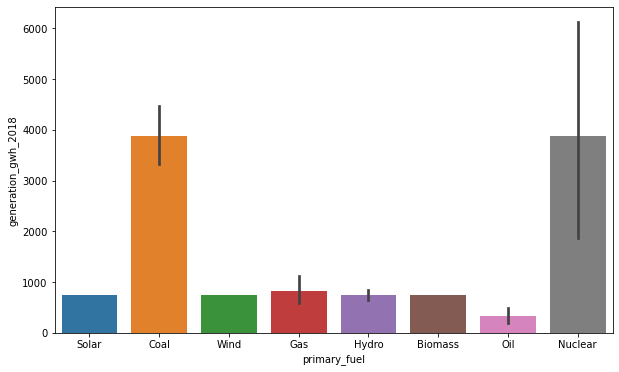

In [64]:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)
plt.show()

##### Here we can see that the maximum genration of electricity is through Nuclear followed by Coal and the least is by Oil in 2017 ..but Here we analyze also that the use of Coal has been increased in 2018 and its almost near to Nuclear.

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:black'> Multi-variate Analysis <h2>

# Lets do encoding first

In [65]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,Central Electricity Authority
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [66]:
# Now Delete Irrelevent columns

df.drop(['name'] , axis=1,inplace=True)

In [67]:
df.drop(['generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

In [68]:
df.shape

(907, 13)

In [69]:
df.head(3)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,801.123775,711.181225,737.20545,817.97725,751.644375
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,801.123775,711.181225,737.20545,817.97725,751.644375


In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['source','geolocation_source','primary_fuel','other_fuel1']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [72]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


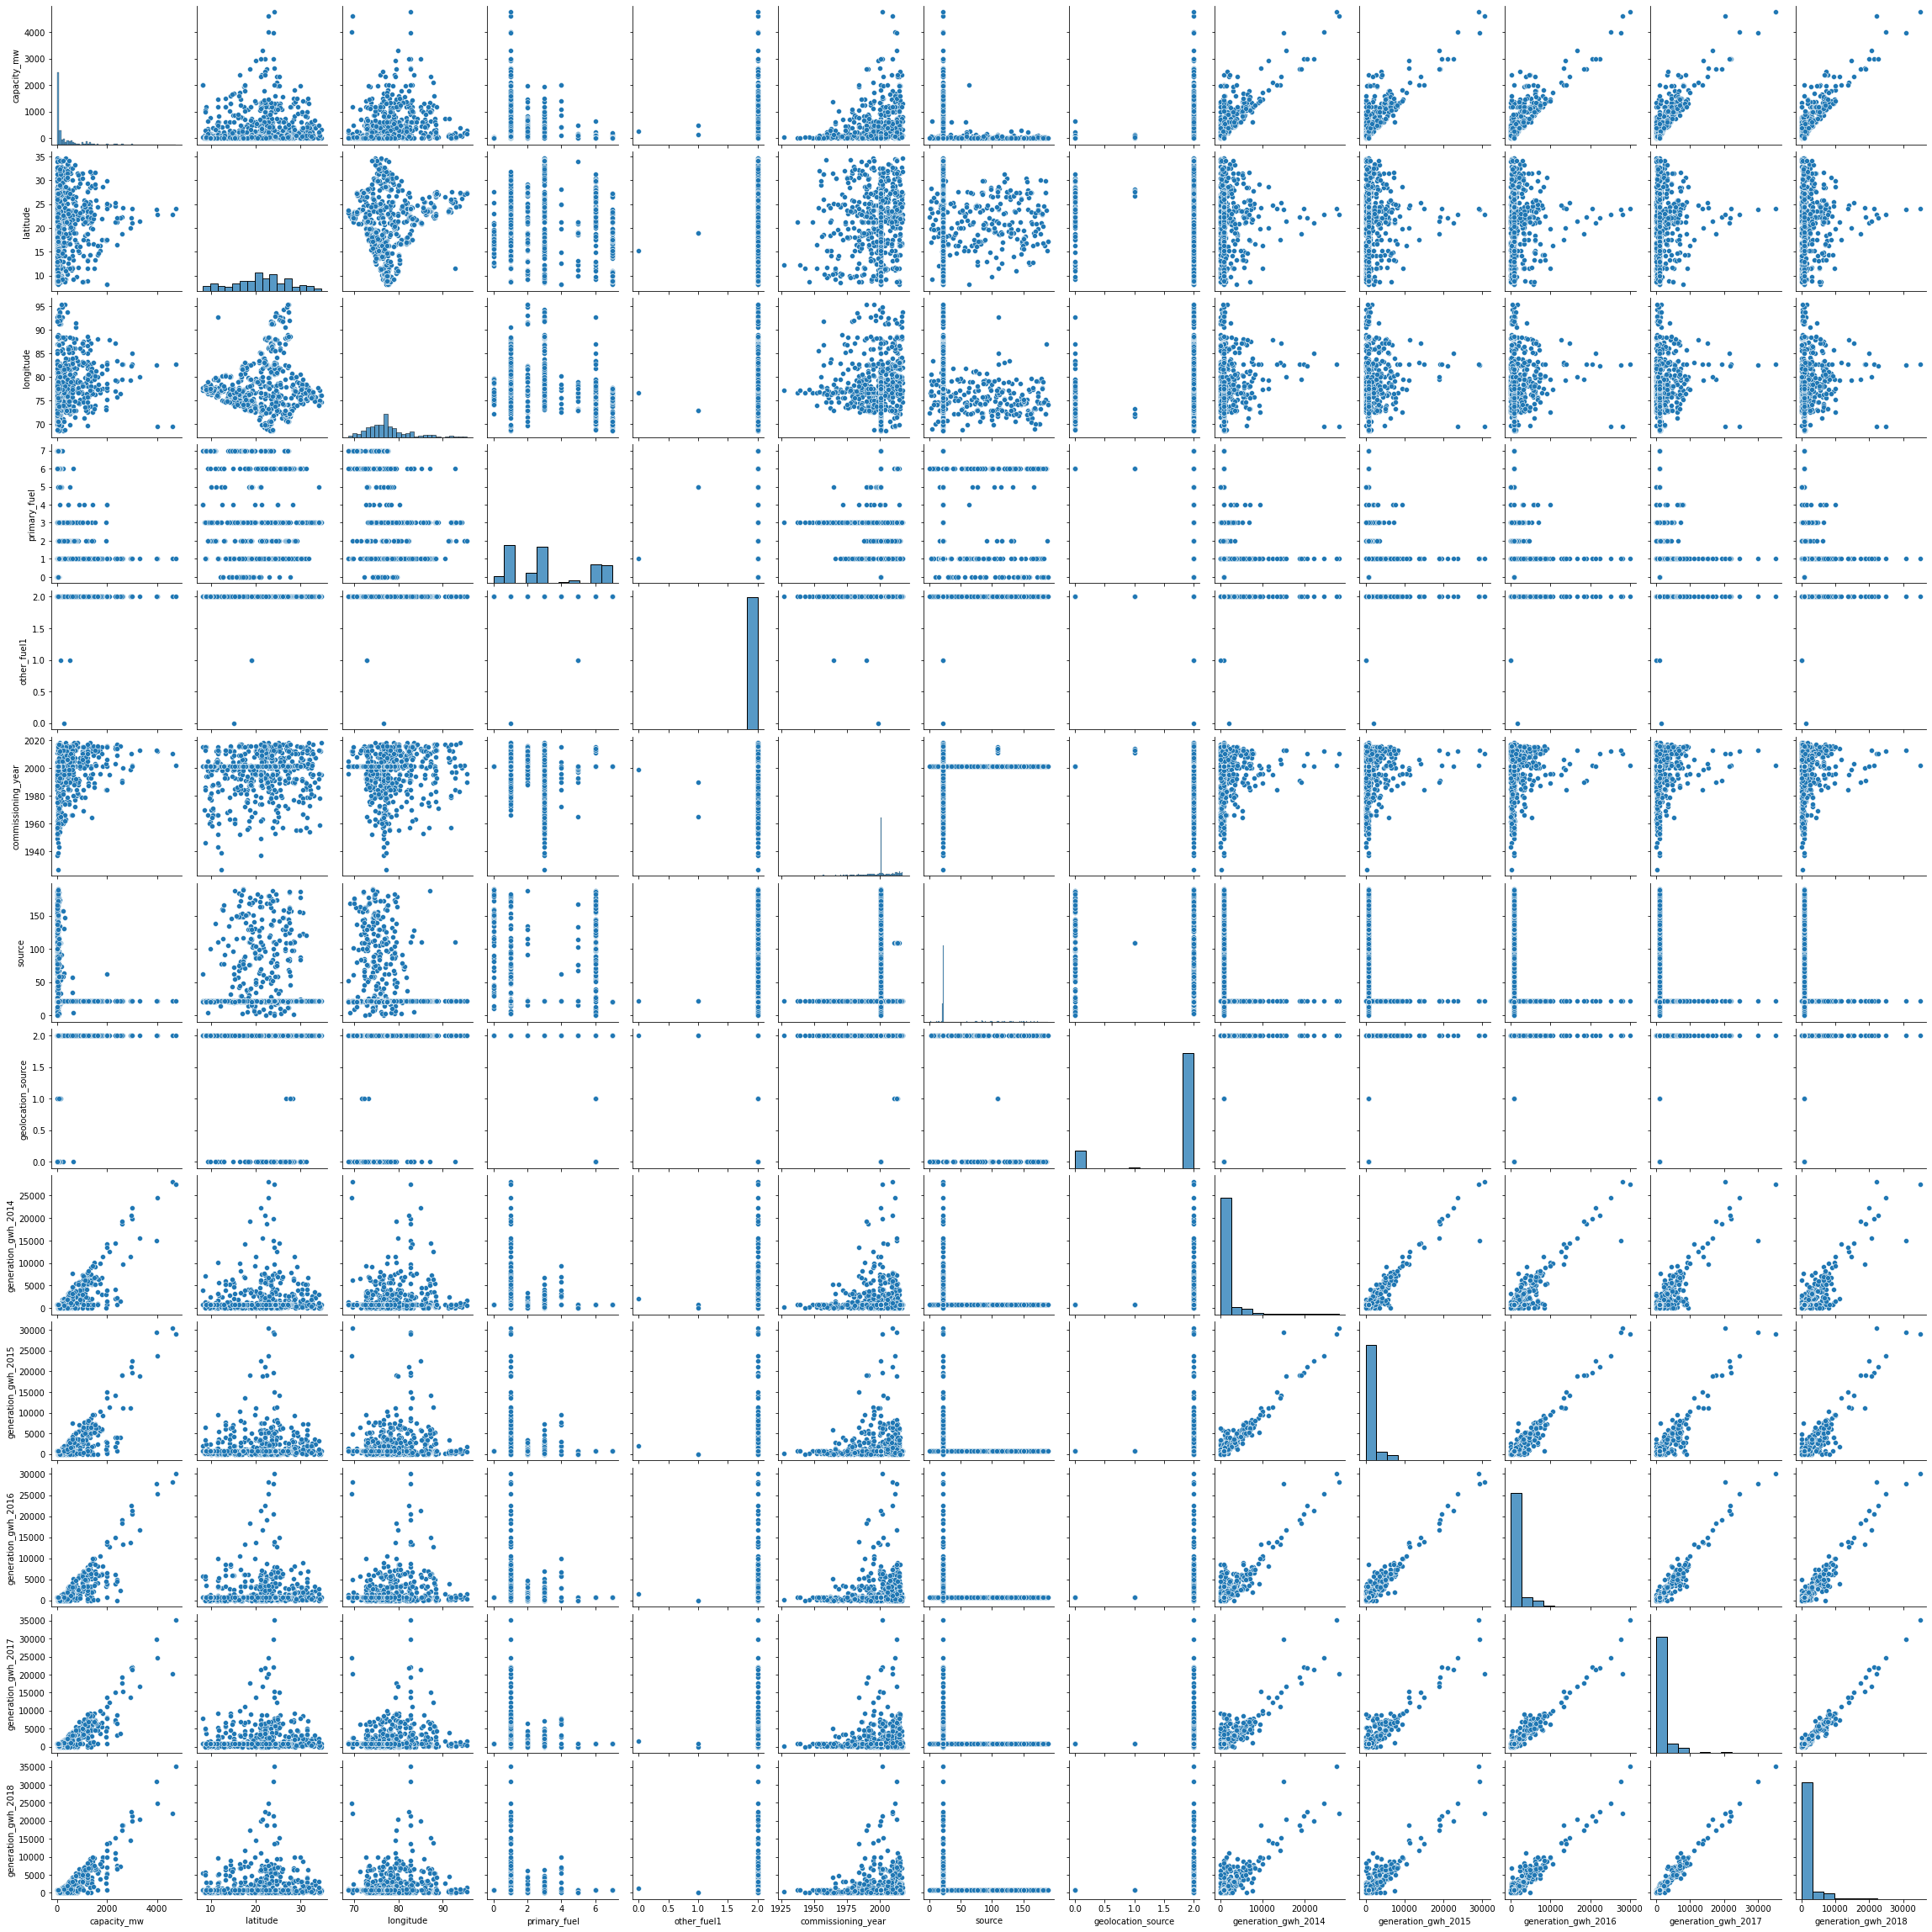

In [73]:
# Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df,palette="rocket")

##### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "capacity_mw". Here we can observe the relation between the features and label.Most of the features have strong linear relationship and correlation with each other.


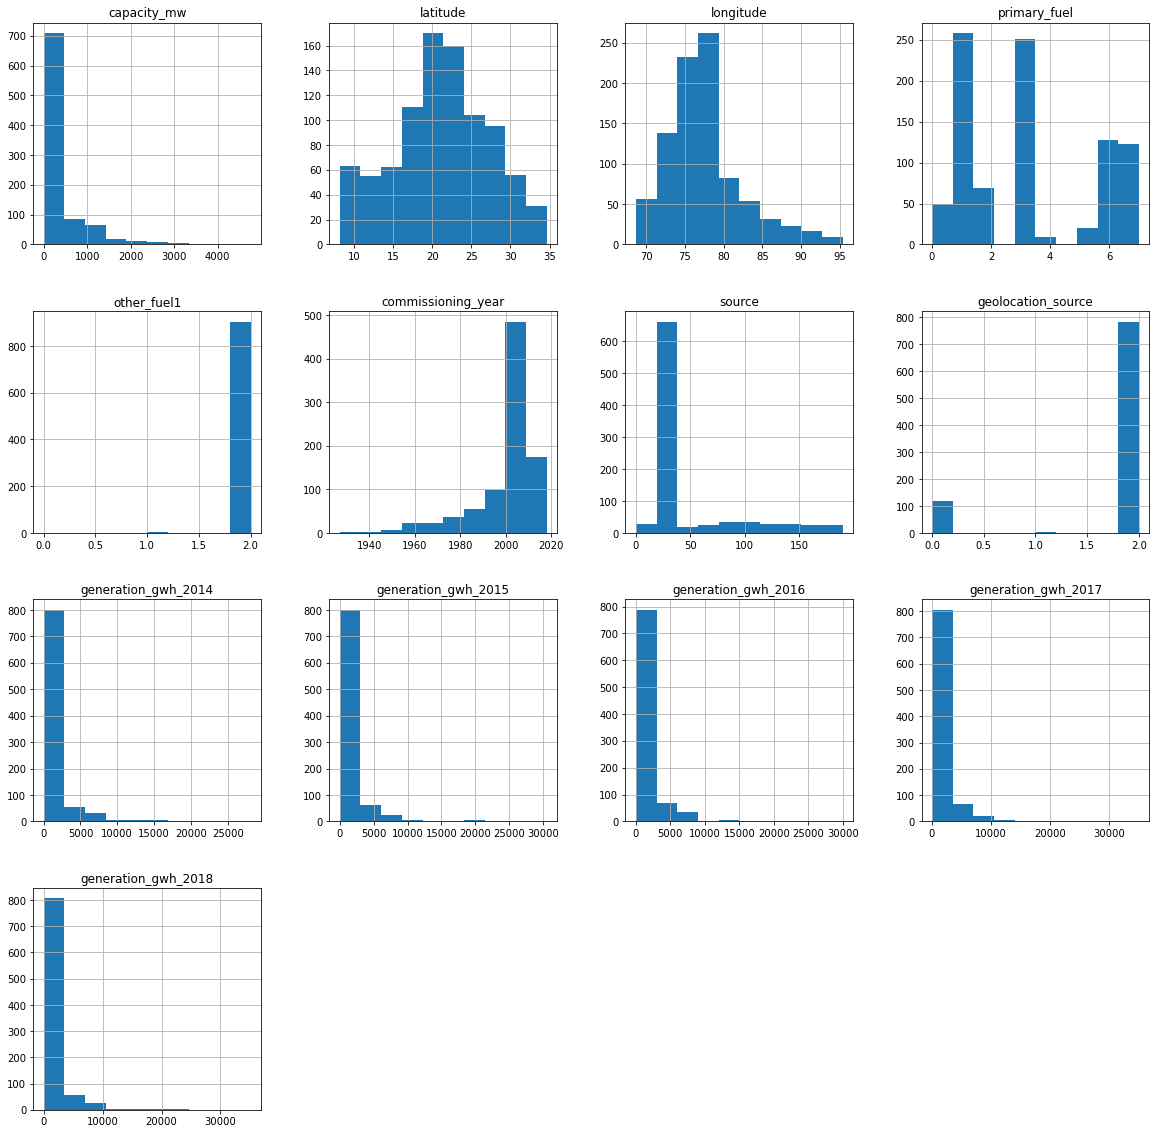

In [74]:
df.hist(bins=10, figsize=(20,20))
plt.show()

##### We can notice that lot of Skewness is present in the dataset(Right and Left both skewness is present) ,So we will reduce all this skewness later. Only latitude seem to have Normal Distribution..

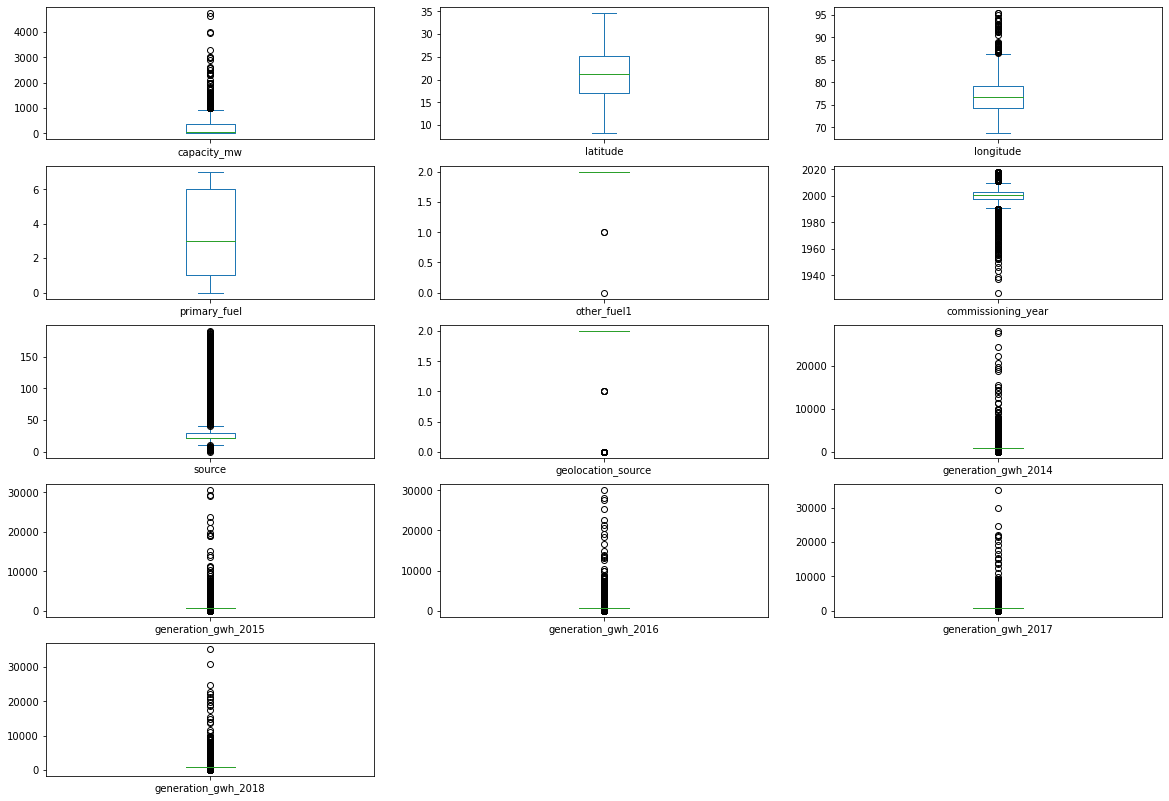

In [75]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))
plt.show()

##### Outliers is also present in many columns which will be treated later

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:black'> CORRELATION <h2>

In [76]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.199299,-0.380395,0.003105,0.211042,-0.242122,0.204865,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036341,-0.010204,0.036695,0.087937,0.055927,-0.184275,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.199299,0.036341,1.000000,-0.352056,0.029867,0.029583,-0.236623,0.249100,0.106855,0.123763,0.145640,0.154014,0.157405
primary_fuel,-0.380395,-0.010204,-0.352056,1.000000,0.004912,-0.054885,0.053613,-0.483217,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
other_fuel1,0.003105,0.036695,0.029867,0.004912,1.000000,0.043267,0.026590,-0.021408,0.005598,0.008950,0.013919,0.012077,0.018076
commissioning_year,0.211042,0.087937,0.029583,-0.054885,0.043267,1.000000,0.100747,-0.073907,0.076971,0.108752,0.140964,0.153554,0.156927
source,-0.242122,0.055927,-0.236623,0.053613,0.026590,0.100747,1.000000,-0.505720,-0.125854,-0.131123,-0.135018,-0.134934,-0.141216
geolocation_source,0.204865,-0.184275,0.249100,-0.483217,-0.021408,-0.073907,-0.505720,1.000000,0.101329,0.105571,0.108707,0.108639,0.113697
generation_gwh_2014,0.793497,0.058594,0.106855,-0.240656,0.005598,0.076971,-0.125854,0.101329,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.123763,-0.249304,0.008950,0.108752,-0.131123,0.105571,0.963719,1.000000,0.973231,0.940229,0.933161


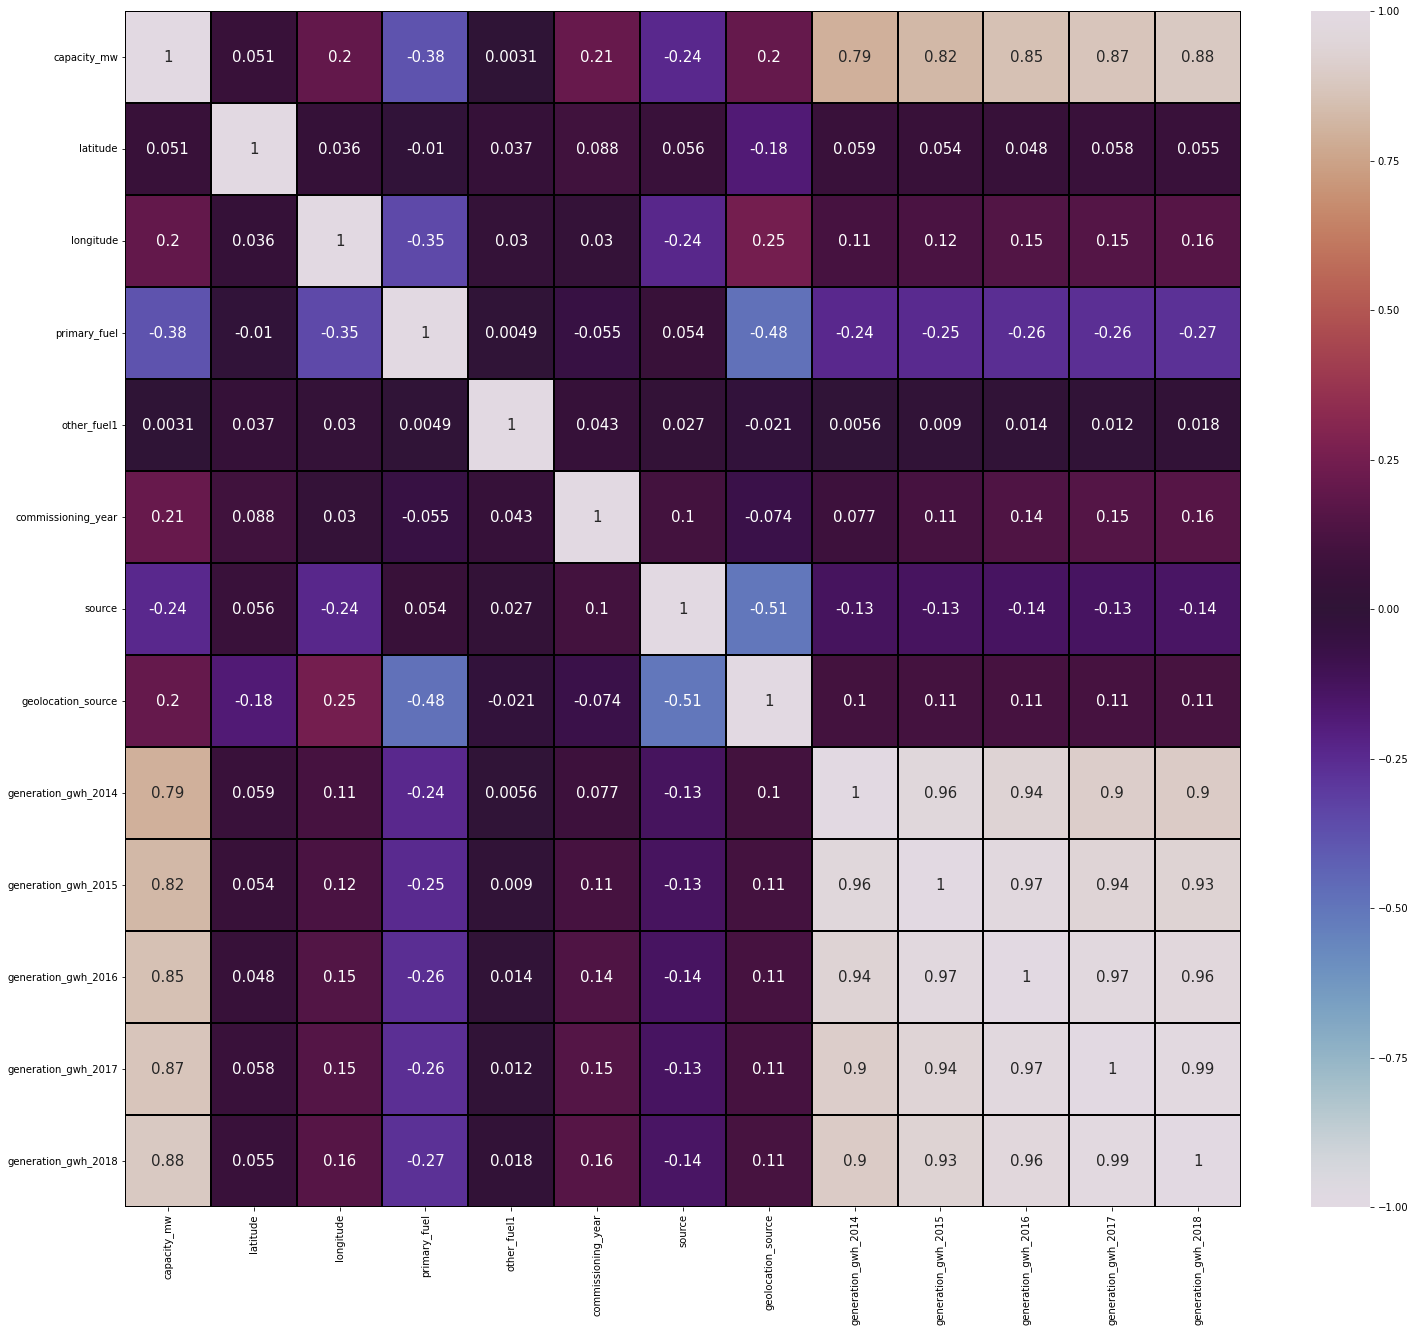

In [77]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="twilight")
plt.yticks(rotation=0);

##### This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

In [78]:
df.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
source                -0.242122
other_fuel1            0.003105
latitude               0.050984
longitude              0.199299
geolocation_source     0.204865
commissioning_year     0.211042
generation_gwh_2014    0.793497
generation_gwh_2015    0.819676
generation_gwh_2016    0.853008
generation_gwh_2017    0.868338
generation_gwh_2018    0.884840
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

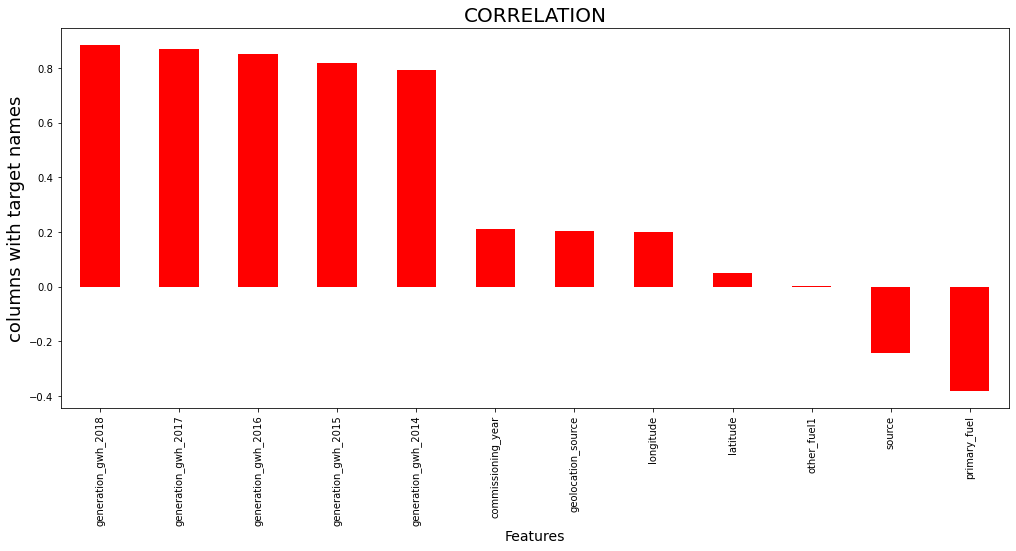

In [79]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='red')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

##### Otherfuel1 and Longitude has a least relationship with target..

In [80]:
df.drop(['other_fuel1','latitude'],axis=1,inplace=True)

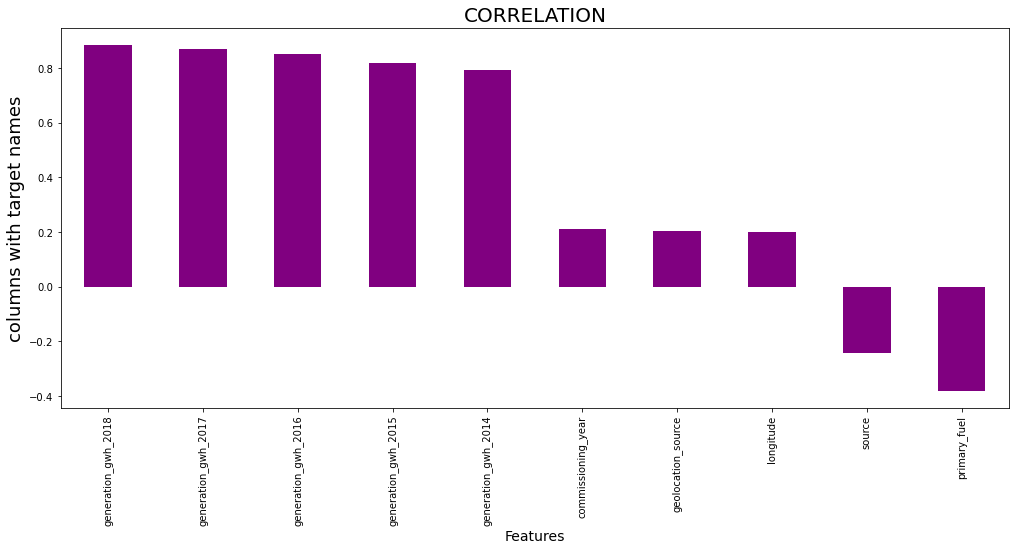

In [81]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='purple')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

##### Looks better now after removing least coreelated feature with target

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:black'> DESCRIPTIVE STATISTICS <h2>

In [82]:
df.describe()

,capacity_mw,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,77.427103,3.206174,1998.728776,43.847850,1.733186,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,4.815073,2.280652,13.158621,44.642818,0.677151,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,74.388900,1.000000,1998.000000,22.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,76.719500,3.000000,2001.000000,22.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,79.206100,6.000000,2003.000000,29.500000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,95.408000,7.000000,2018.000000,190.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


##### All columns have count of 907 which means no missing value.. we can there is skewness and outliers present in dataset

<AxesSubplot:>

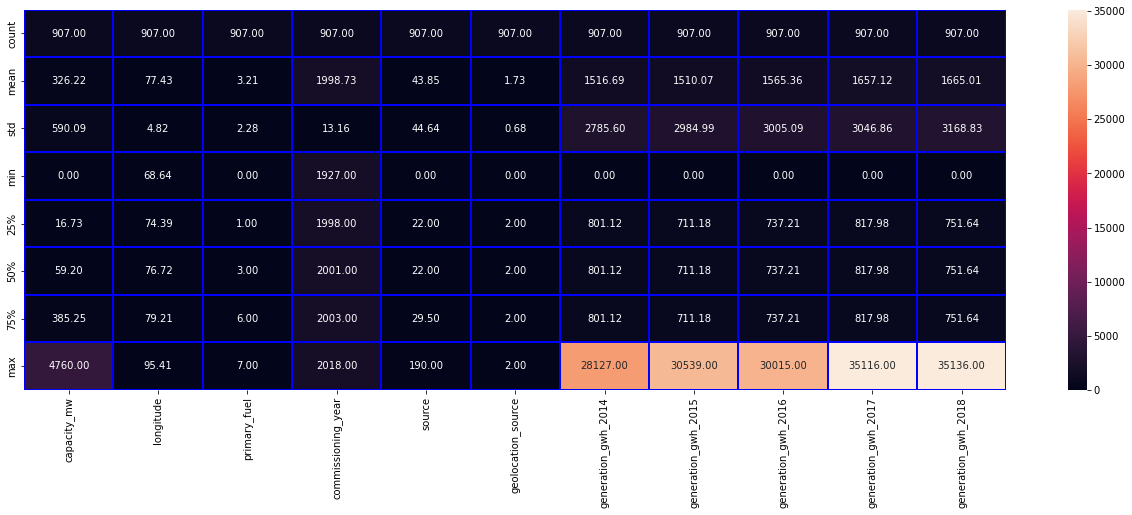

In [83]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="blue",fmt="0.2f")

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:black'> Now lets Check Outliers in the dataset <h2>

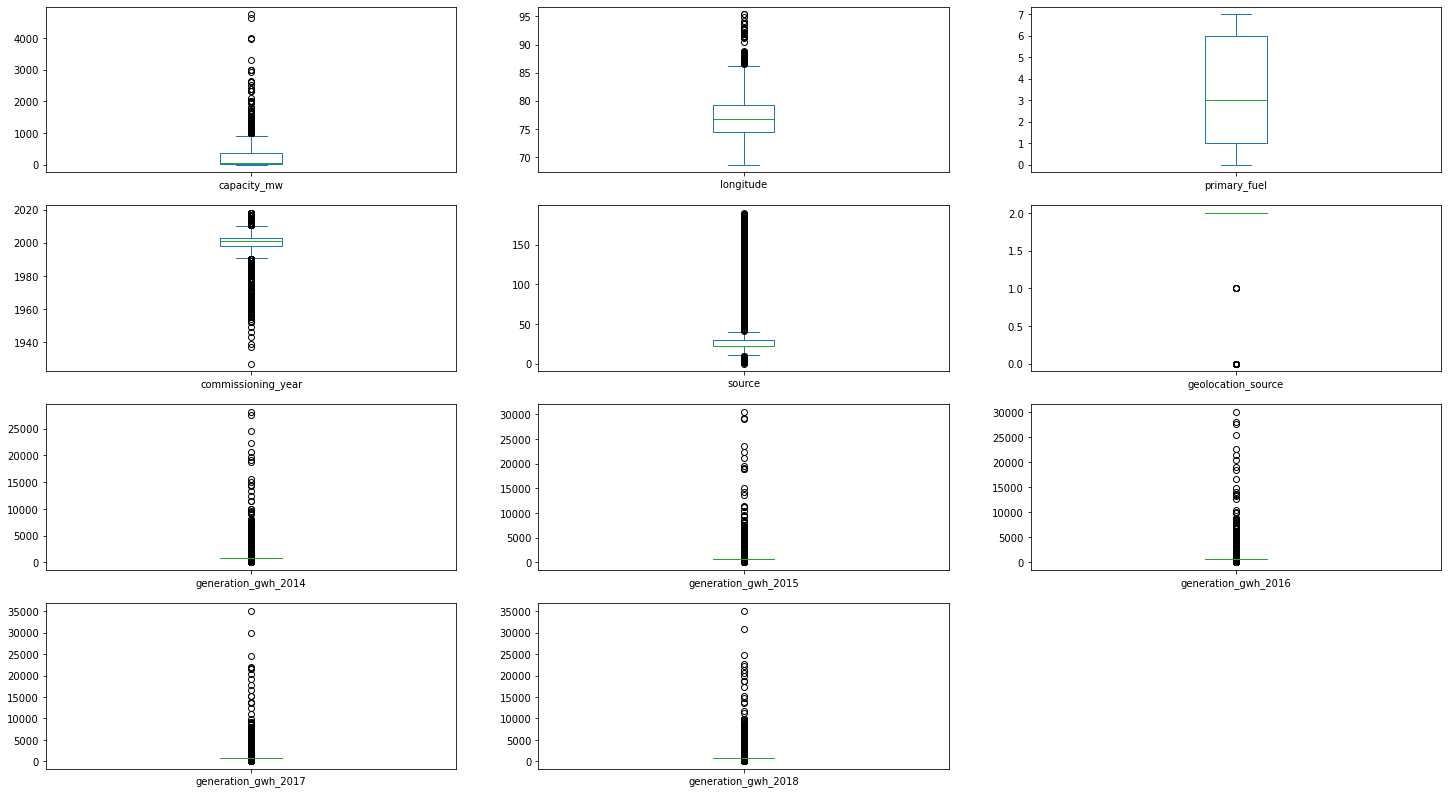

In [84]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(25,25))
plt.show()

##### There are columns that contains outliers so lets remove it first

# ZScore Method

In [85]:
from scipy.stats import zscore

In [86]:
# Features containing outliers
features = df[['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','source']]

# Using zscore to remove outliers

z=np.abs(zscore(features))

z

,capacity_mw,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,source
0,0.548908,0.869917,0.933076,0.257022,0.267783,0.275737,0.275565,0.288394,1.460215
1,0.386977,0.585590,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394,2.917019
2,0.486679,1.673567,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394,0.512075
3,0.324240,2.895239,0.400812,0.322873,0.223348,0.226194,0.326203,0.327990,0.489662
4,2.498942,1.035238,1.237227,0.545554,1.476964,1.557432,1.224379,1.772608,0.489662
...,...,...,...,...,...,...,...,...,...
902,2.159821,0.014609,1.313265,0.257022,0.505833,0.443415,0.259992,0.308963,0.489662
903,0.548060,0.153415,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394,0.743019
904,0.509909,0.383592,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394,0.512075
905,0.417498,0.764564,0.172699,0.257022,0.267783,0.275737,0.275565,0.288394,0.339596


In [87]:
df_new=df[(z<3).all(axis=1)]

In [88]:
df_new.shape

(831, 11)

In [89]:
# Percentage of data loss

DataLoss=((907-831)/907)*100
DataLoss

8.379272326350605

##### 8% of data loss in zscore method

# IQR Method

In [90]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [91]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (907, 11)

New DataFrame data in Rows and Column: (185, 11)

Total Dropped rows: 722


In [92]:
#Percentage Data Loss using IQR
data_loss1 = (907-185)/907*100
data_loss1

79.60308710033075

##### 80% data loss in iqr method

### so opting for zscore method

<h2 style='text-align:center;font-size:50px;background-color:white;border:50px;color:black'> Lets Check Skewness <h2>


In [93]:
df.skew()

capacity_mw            3.123576
longitude              1.163320
primary_fuel           0.472251
commissioning_year    -1.719575
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

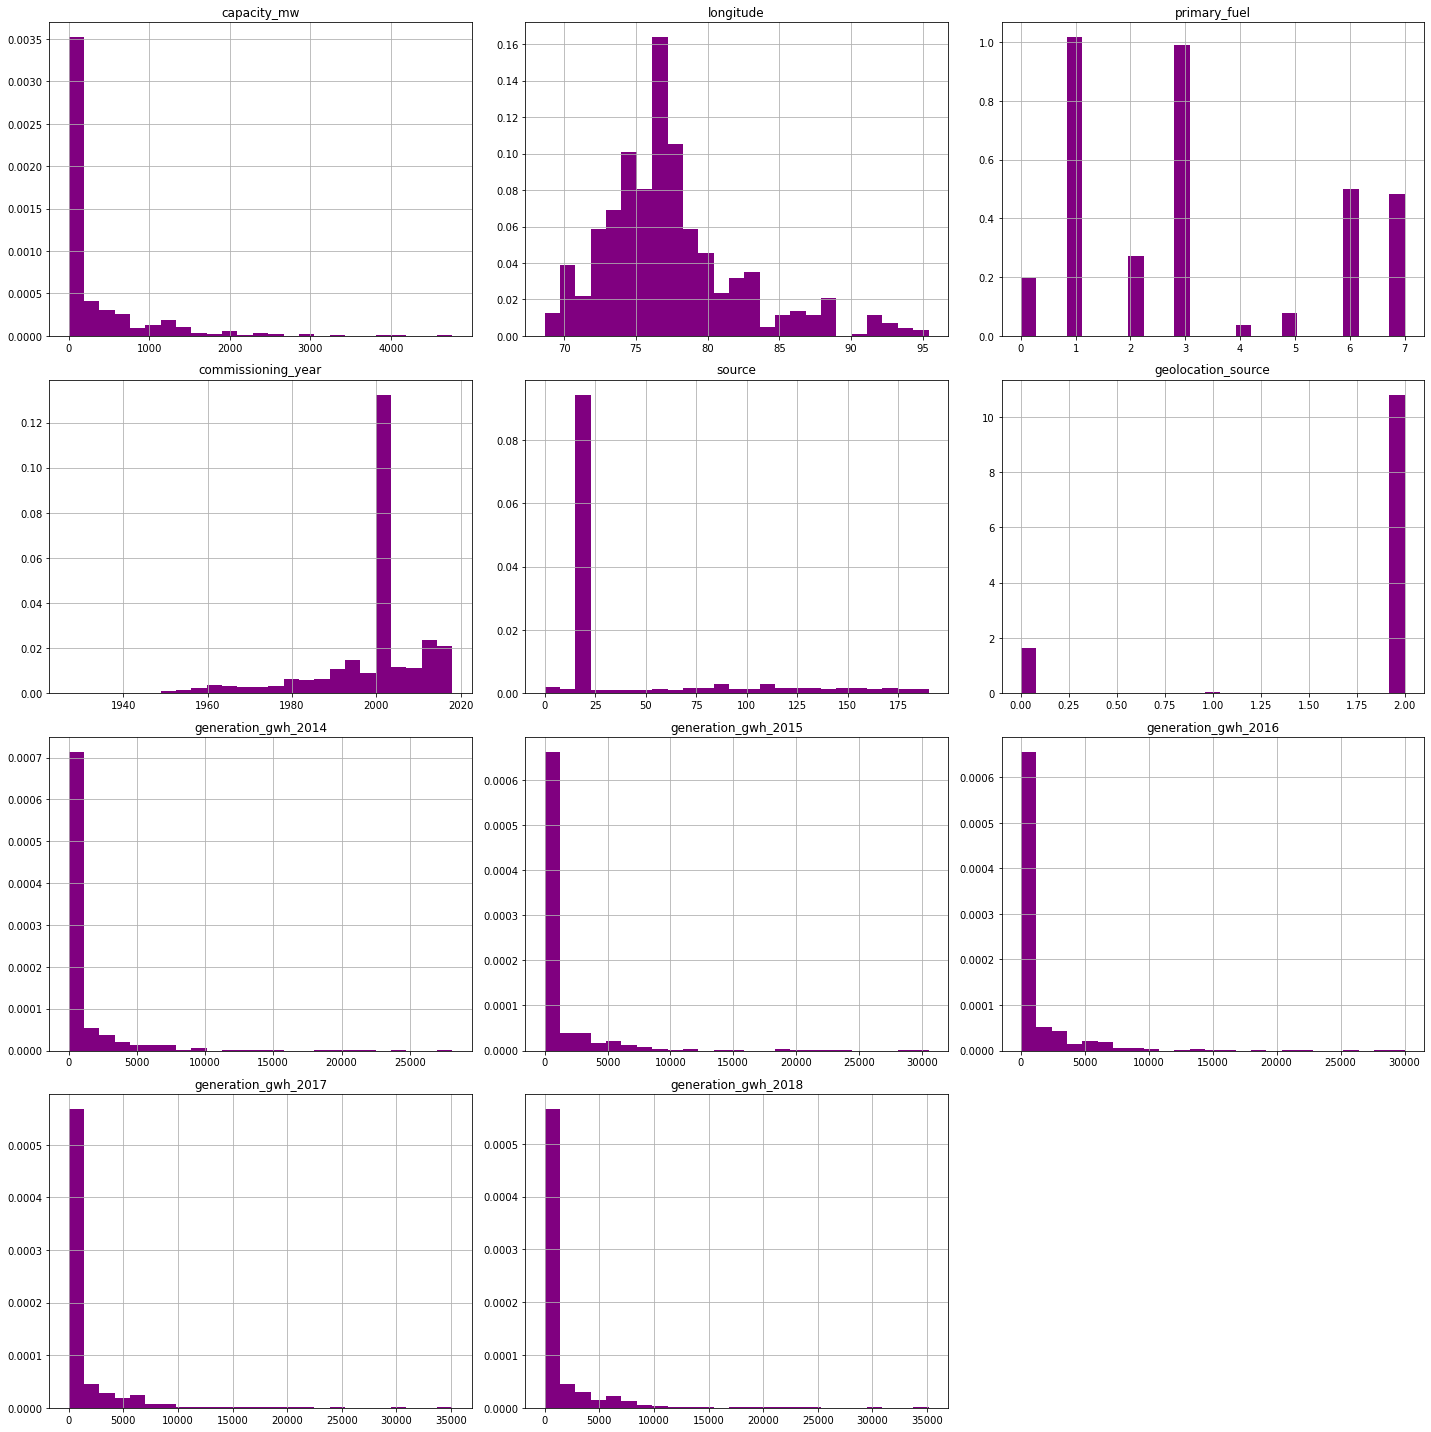

In [94]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='purple',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

#### Skewness is present

# Lets Remove Skeweness

In [95]:
L1=['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

In [96]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [97]:
#Removing skewness using yeo-johnson
df_new[['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']] = PT.fit_transform(df_new[['capacity_mw','longitude','commissioning_year','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].values)

In [98]:
#Checking skewness after removing skewness by power transform
df_new.skew()

capacity_mw            0.011275
longitude             -0.000024
primary_fuel           0.407590
commissioning_year    -0.320212
source                 1.778820
geolocation_source    -2.098153
generation_gwh_2014    0.225137
generation_gwh_2015    0.159738
generation_gwh_2016    0.145541
generation_gwh_2017    0.122280
generation_gwh_2018    0.128320
dtype: float64

##### Skewness has been removed except from categorical column

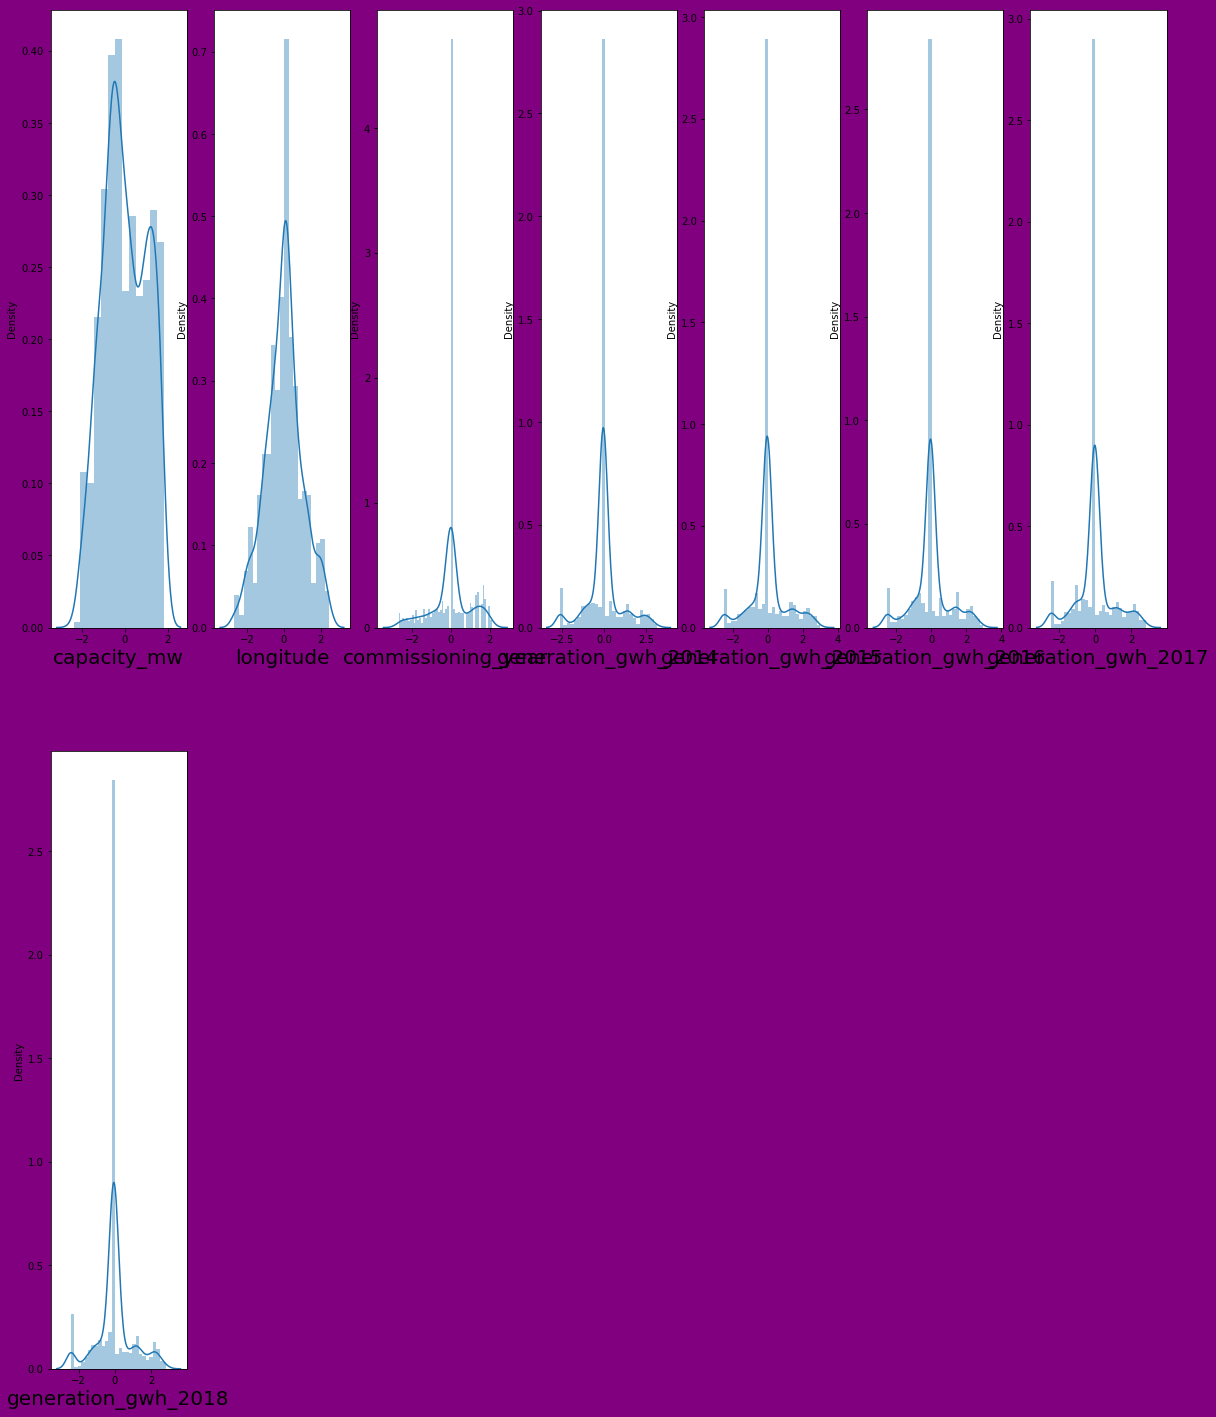

In [99]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### Now all columns are normaly distributed

<h2 style='text-align:center;font-size:30px;background-color:white;border:30px;color:black'> *Now Lets Split the dataset into dependent and independent variable* <h2>

In [100]:
df_new.head()

,capacity_mw,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.670884,-0.919533,6,1.146684,109,1,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
1,0.212859,-0.500035,1,0.002145,174,2,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
2,-0.283501,-2.362744,7,0.002145,21,2,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
3,0.385748,2.428757,2,0.318433,22,2,-0.261329,0.100496,0.110626,-0.190069,-0.185260
4,1.754701,1.256477,1,1.682949,22,2,1.418352,2.279721,2.278676,2.000706,2.388026


In [101]:
x=df_new.loc [:,df_new.columns != 'capacity_mw']

# Independent Variable

In [102]:
y=df_new.loc[:,'capacity_mw']

#Dependent Variable

In [103]:

x.shape

(831, 10)

In [104]:
y.shape

(831,)

<h2 style='text-align:center;font-size:40px;background-color:white;border:40px;color:black'> *Now Lets Scale The Dataset* <h2>

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.919533,1.166969,1.146684,1.569568,-1.052547,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
1,-0.500035,-0.991872,0.002145,3.111110,0.402805,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
2,-2.362744,1.598738,0.002145,-0.517443,0.402805,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
3,2.428757,-0.560104,0.318433,-0.493727,0.402805,-0.261329,0.100496,0.110626,-0.190069,-0.185260
4,1.256477,-0.991872,1.682949,-0.493727,0.402805,1.418352,2.279721,2.278676,2.000706,2.388026
...,...,...,...,...,...,...,...,...,...,...
826,0.228263,-0.991872,1.824833,-0.493727,0.402805,-0.038385,-2.443426,-0.835353,0.020750,-0.116730
827,0.417298,1.166969,0.002145,0.810655,-2.507900,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
828,-0.226096,1.598738,0.002145,-0.517443,0.402805,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398
829,-0.759226,-0.991872,0.002145,0.383766,0.402805,-0.038385,-0.041621,-0.040887,-0.025388,-0.047398


<h2 style='text-align:center;font-size:30px;background-color:white;border:30px;color:black'> *Now Lets Check Whether Multicollinearity is present in the dataset or not * <h2>

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [109]:
vif_cal()

   VIF FACTOR             FEATURES
0    1.324615            longitude
1    1.648104         primary_fuel
2    1.100281   commissioning_year
3    1.532993               source
4    1.887364   geolocation_source
5    3.591544  generation_gwh_2014
6    6.250945  generation_gwh_2015
7   10.908215  generation_gwh_2016
8    9.665460  generation_gwh_2017
9    9.188648  generation_gwh_2018


### We are not dropping any because no column vif is above 10

# Model Training and Testing

In [110]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [111]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.5532101260445879
At random state 0,the testing accuracy is :- 0.3651858724778473



At random state 1,the training accuracy is :- 0.5308924992911663
At random state 1,the testing accuracy is :- 0.48199662481941075



At random state 2,the training accuracy is :- 0.5024682811728447
At random state 2,the testing accuracy is :- 0.5896813984030974



At random state 3,the training accuracy is :- 0.5404783721163775
At random state 3,the testing accuracy is :- 0.44501554952160327



At random state 4,the training accuracy is :- 0.5101887796197693
At random state 4,the testing accuracy is :- 0.5578594631169076



At random state 5,the training accuracy is :- 0.5186464096441031
At random state 5,the testing accuracy is :- 0.5266637915661845



At random state 6,the training accuracy is :- 0.5100706377002651
At random state 6,the testing accuracy is :- 0.5581017116310276



At random state 7,the training accuracy is :- 0.53809875630848
At random s

At random state 75,the training accuracy is :- 0.5330396094194415
At random state 75,the testing accuracy is :- 0.4655906367304571



At random state 76,the training accuracy is :- 0.5276568922892364
At random state 76,the testing accuracy is :- 0.4929853591859267



At random state 77,the training accuracy is :- 0.5299375991194785
At random state 77,the testing accuracy is :- 0.4744425739414111



At random state 78,the training accuracy is :- 0.5259993267034
At random state 78,the testing accuracy is :- 0.48619532737905413



At random state 79,the training accuracy is :- 0.5185211385606963
At random state 79,the testing accuracy is :- 0.5245463810868256



At random state 80,the training accuracy is :- 0.5296633268138516
At random state 80,the testing accuracy is :- 0.48647584294646484



At random state 81,the training accuracy is :- 0.5163336842433339
At random state 81,the testing accuracy is :- 0.53986614344787



At random state 82,the training accuracy is :- 0.5104655492422583

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [113]:
# train the model
lr.fit(x_train,y_train)

LinearRegression()

In [114]:
# predict the  data with x_test

pred_test=lr.predict(x_test)

In [115]:
print (r2_score(y_test,pred_test))

0.5005699009612772


# CROSS VALIDATION OF THE LINEAR REGRESSION MODEL


In [116]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_lr)

In [117]:
for i in range(4,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 49.96358200284702
Accuracy_score is :- 50.05699009612772


At cv:- 5
Cross validation score is :- 50.23145274244318
Accuracy_score is :- 50.05699009612772


At cv:- 6
Cross validation score is :- 50.34180190174564
Accuracy_score is :- 50.05699009612772


At cv:- 7
Cross validation score is :- 49.05796175069109
Accuracy_score is :- 50.05699009612772


At cv:- 8
Cross validation score is :- 49.96855116916322
Accuracy_score is :- 50.05699009612772


At cv:- 9
Cross validation score is :- 48.9505737917279
Accuracy_score is :- 50.05699009612772




In [118]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.5023145274244318 
The accuracy_score is: 0.5005699009612772


In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [120]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.5762712030133608
Mean Squared Error :-> 0.5041353835178682
Root Mean Squared Error :-> 0.7100249175330878


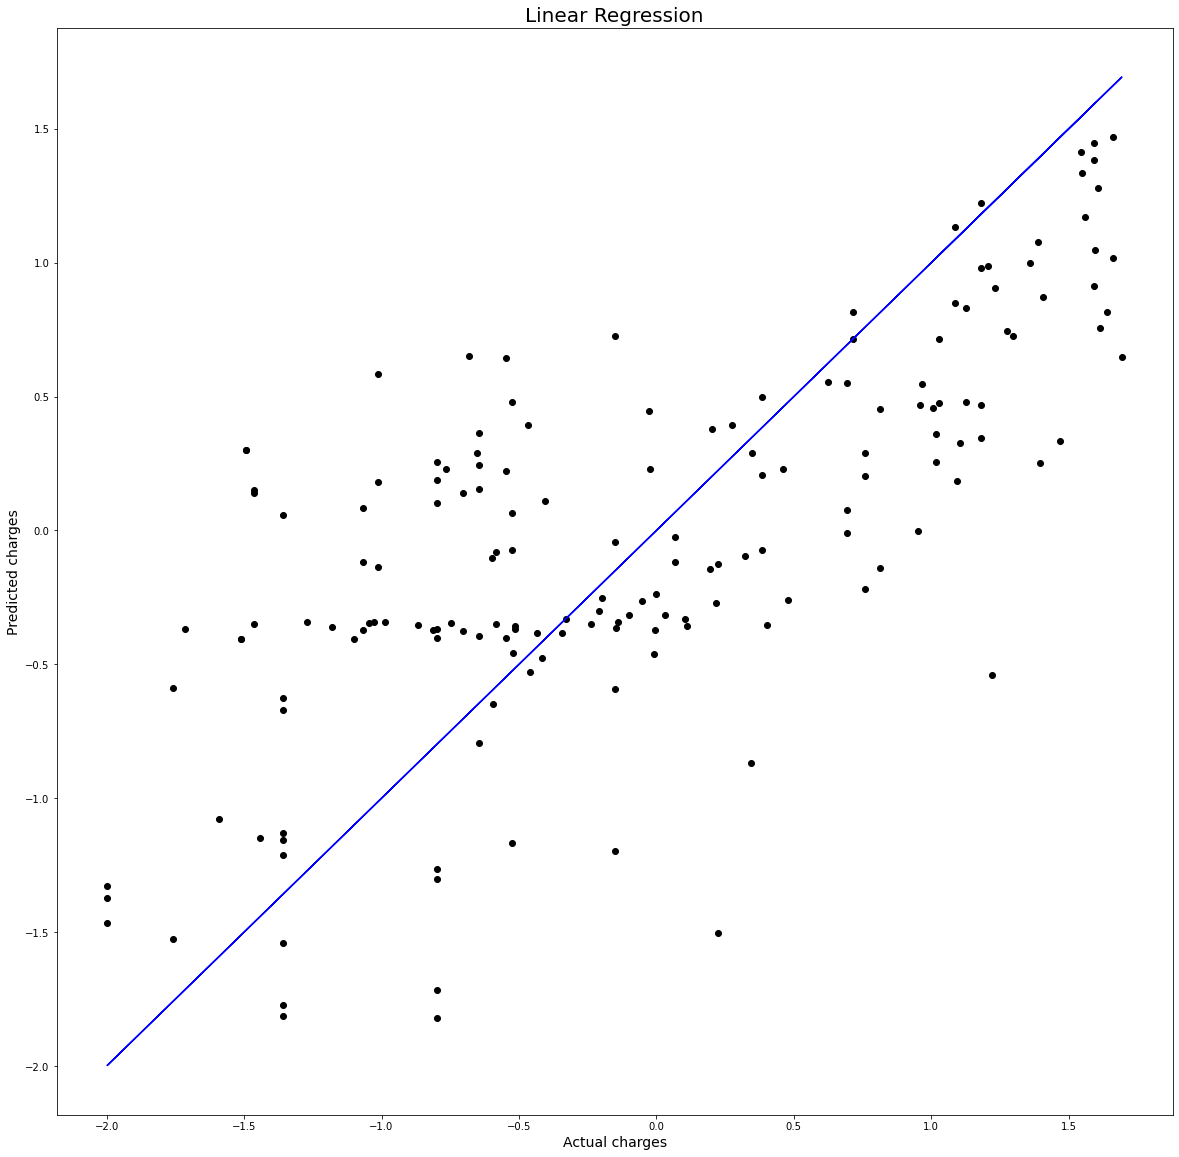

In [121]:
import matplotlib.pyplot as plt
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression' , fontsize=20)
plt. show()

##### So data is scattered and is far away from best fit line

# Decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [123]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    pred_train=dt.predict(x_train)
    pred_test=dt.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.9929864454218531
At random state 0,the testing accuracy is :- 0.5604351163166509



At random state 1,the training accuracy is :- 0.9919693110197505
At random state 1,the testing accuracy is :- 0.6085356317853561



At random state 2,the training accuracy is :- 0.9948897036335289
At random state 2,the testing accuracy is :- 0.6565132856418113



At random state 3,the training accuracy is :- 0.9942773594524902
At random state 3,the testing accuracy is :- 0.6356171714458525



At random state 4,the training accuracy is :- 0.9924168828344342
At random state 4,the testing accuracy is :- 0.7199859781202367



At random state 5,the training accuracy is :- 0.992948324407347
At random state 5,the testing accuracy is :- 0.6525713448048323



At random state 6,the training accuracy is :- 0.9928891889695978
At random state 6,the testing accuracy is :- 0.6293845384435182



At random state 7,the training accuracy is :- 0.9937414827893541
At random st

At random state 72,the training accuracy is :- 0.9915776228817307
At random state 72,the testing accuracy is :- 0.6610949931898153



At random state 73,the training accuracy is :- 0.9942684240116713
At random state 73,the testing accuracy is :- 0.6403862204514736



At random state 74,the training accuracy is :- 0.992166922752239
At random state 74,the testing accuracy is :- 0.5525106766899699



At random state 75,the training accuracy is :- 0.992776951104793
At random state 75,the testing accuracy is :- 0.6881482404435203



At random state 76,the training accuracy is :- 0.9944270742039136
At random state 76,the testing accuracy is :- 0.6731408768318146



At random state 77,the training accuracy is :- 0.9927116873800119
At random state 77,the testing accuracy is :- 0.7548793083261283



At random state 78,the training accuracy is :- 0.9916628034032051
At random state 78,the testing accuracy is :- 0.7111344766700114



At random state 79,the training accuracy is :- 0.992917427101878

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [125]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [126]:
pred_test=dt.predict(x_test)

In [127]:
print (r2_score(y_test,pred_test))

0.7580504199278535


In [128]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.3670699191014491
Mean Squared Error :-> 0.2535987137799556
Root Mean Squared Error :-> 0.5035858554208563


# CV of DTR

In [129]:
pred_dt=dt.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_dt)

In [130]:
for i in range(4,10):
    lsscore=cross_val_score(dt,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 4
Cross validation score is :- 64.40719105475829
Accuracy_score is :- 75.80504199278535


At cv:- 5
Cross validation score is :- 64.94997454513657
Accuracy_score is :- 75.80504199278535


At cv:- 6
Cross validation score is :- 65.7484487202099
Accuracy_score is :- 75.80504199278535


At cv:- 7
Cross validation score is :- 65.1687559092365
Accuracy_score is :- 75.80504199278535


At cv:- 8
Cross validation score is :- 65.45882095560785
Accuracy_score is :- 75.80504199278535


At cv:- 9
Cross validation score is :- 61.16408594868699
Accuracy_score is :- 75.80504199278535




In [131]:
# I will take CV as 8 bcz its close to accuracy score
lsscore_selected= cross_val_score(dt,x,y,cv=8).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.652126881278287 
The accuracy_score is: 0.7580504199278535


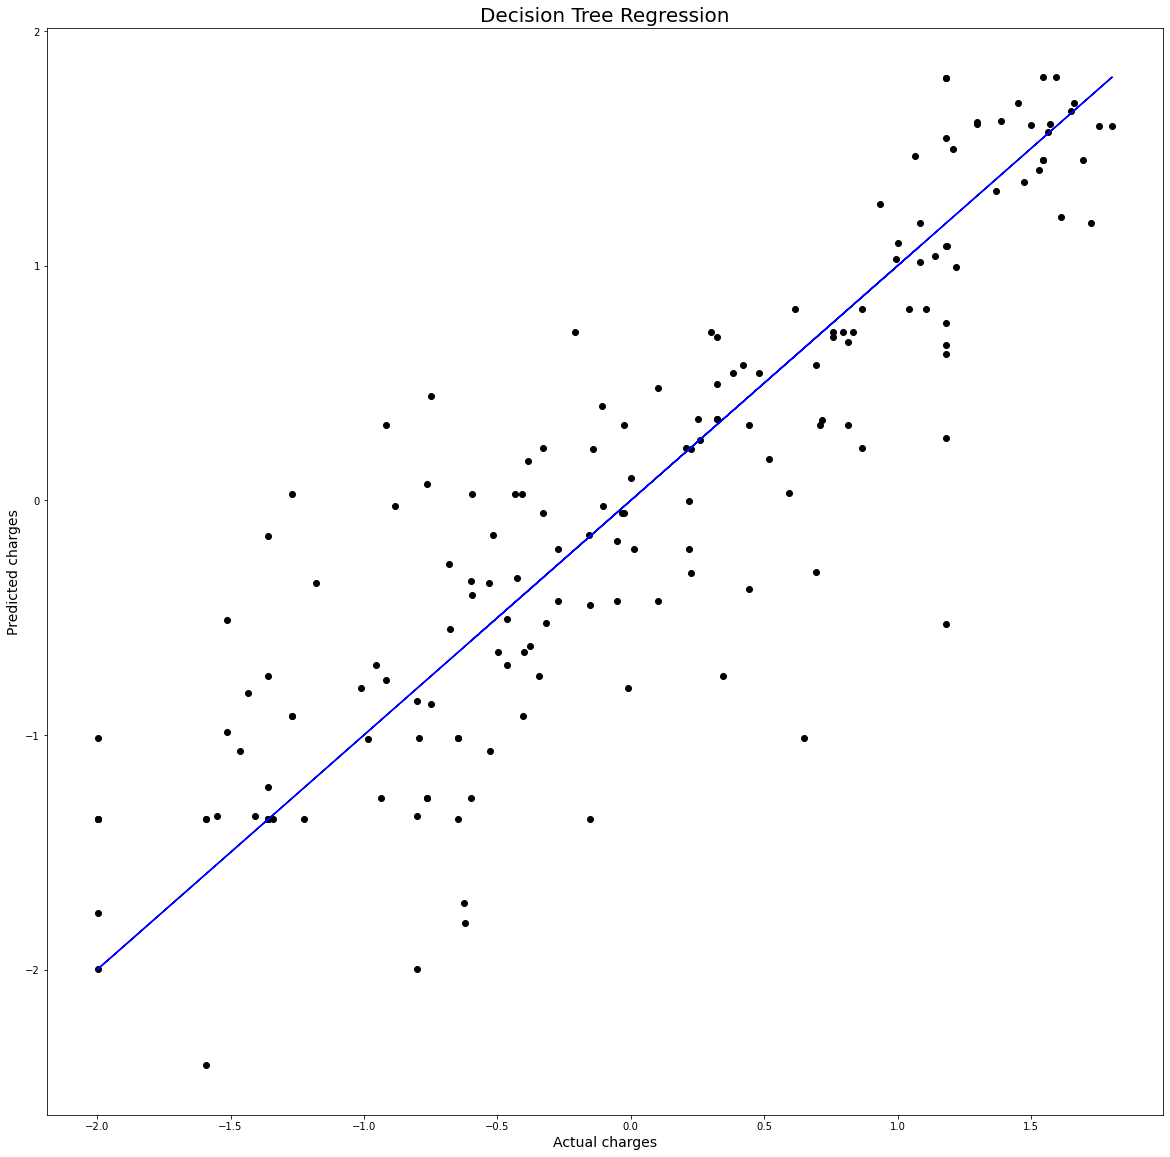

In [132]:
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('Decision Tree Regression' , fontsize=20)
plt. show()

### Data is scattered and is away from best fit line

# KNeighbors Regressor

In [133]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [134]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print ("\n\n")

At random state 0,the training accuracy is :- 0.8111308756045228
At random state 0,the testing accuracy is :- 0.6576921954258043



At random state 1,the training accuracy is :- 0.8090011022394619
At random state 1,the testing accuracy is :- 0.7020259518207511



At random state 2,the training accuracy is :- 0.7962432722020717
At random state 2,the testing accuracy is :- 0.741796586631349



At random state 3,the training accuracy is :- 0.8244272365539438
At random state 3,the testing accuracy is :- 0.6326899185342165



At random state 4,the training accuracy is :- 0.8004631555733889
At random state 4,the testing accuracy is :- 0.7198064601556464



At random state 5,the training accuracy is :- 0.7958260177995939
At random state 5,the testing accuracy is :- 0.7417480282654563



At random state 6,the training accuracy is :- 0.8021588722506123
At random state 6,the testing accuracy is :- 0.7225670951362722



At random state 7,the training accuracy is :- 0.8082027273979718
At random st

At random state 62,the training accuracy is :- 0.790367352173506
At random state 62,the testing accuracy is :- 0.7497542391562437



At random state 63,the training accuracy is :- 0.7951709893175093
At random state 63,the testing accuracy is :- 0.7956338758894713



At random state 64,the training accuracy is :- 0.7917327054052328
At random state 64,the testing accuracy is :- 0.7506870911733519



At random state 65,the training accuracy is :- 0.8110299071694445
At random state 65,the testing accuracy is :- 0.6923332031255598



At random state 66,the training accuracy is :- 0.8055643155035517
At random state 66,the testing accuracy is :- 0.6864227169216045



At random state 67,the training accuracy is :- 0.809883229362207
At random state 67,the testing accuracy is :- 0.6951142694779917



At random state 68,the training accuracy is :- 0.8137493372607308
At random state 68,the testing accuracy is :- 0.7145206337665716



At random state 69,the training accuracy is :- 0.802039594924627

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=19)

In [136]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [137]:
pred_test=knn.predict(x_test)


In [138]:
print (r2_score(y_test,pred_test))

0.7664417081158983


In [139]:
print (' **ERROR** ')

print ('Mean Absolute Error :->',mean_absolute_error(y_test,pred_test))
print ('Mean Squared Error :->',mean_squared_error(y_test,pred_test))

print ('Root Mean Squared Error :->',np.sqrt(mean_squared_error(y_test,pred_test)))

 **ERROR** 
Mean Absolute Error :-> 0.36224018905332833
Mean Squared Error :-> 0.2410523114515223
Root Mean Squared Error :-> 0.490970784723004


# CV of KN Regressor

In [140]:
pred_kn=knn.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,pred_kn)

In [141]:
for i in range(2,10):
    lsscore=cross_val_score(knn,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 2
Cross validation score is :- 68.62393214804263
Accuracy_score is :- 76.64417081158983


At cv:- 3
Cross validation score is :- 68.56449579497173
Accuracy_score is :- 76.64417081158983


At cv:- 4
Cross validation score is :- 68.31552124659999
Accuracy_score is :- 76.64417081158983


At cv:- 5
Cross validation score is :- 68.43796685851078
Accuracy_score is :- 76.64417081158983


At cv:- 6
Cross validation score is :- 68.62494831350591
Accuracy_score is :- 76.64417081158983


At cv:- 7
Cross validation score is :- 68.62603623813493
Accuracy_score is :- 76.64417081158983


At cv:- 8
Cross validation score is :- 69.53942281212348
Accuracy_score is :- 76.64417081158983


At cv:- 9
Cross validation score is :- 69.0501662761575
Accuracy_score is :- 76.64417081158983




In [142]:
# I will take CV as 8 bcz its close to accuracy score
lsscore_selected= cross_val_score(knn,x,y,cv=8).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.6953942281212347 
The accuracy_score is: 0.7664417081158983


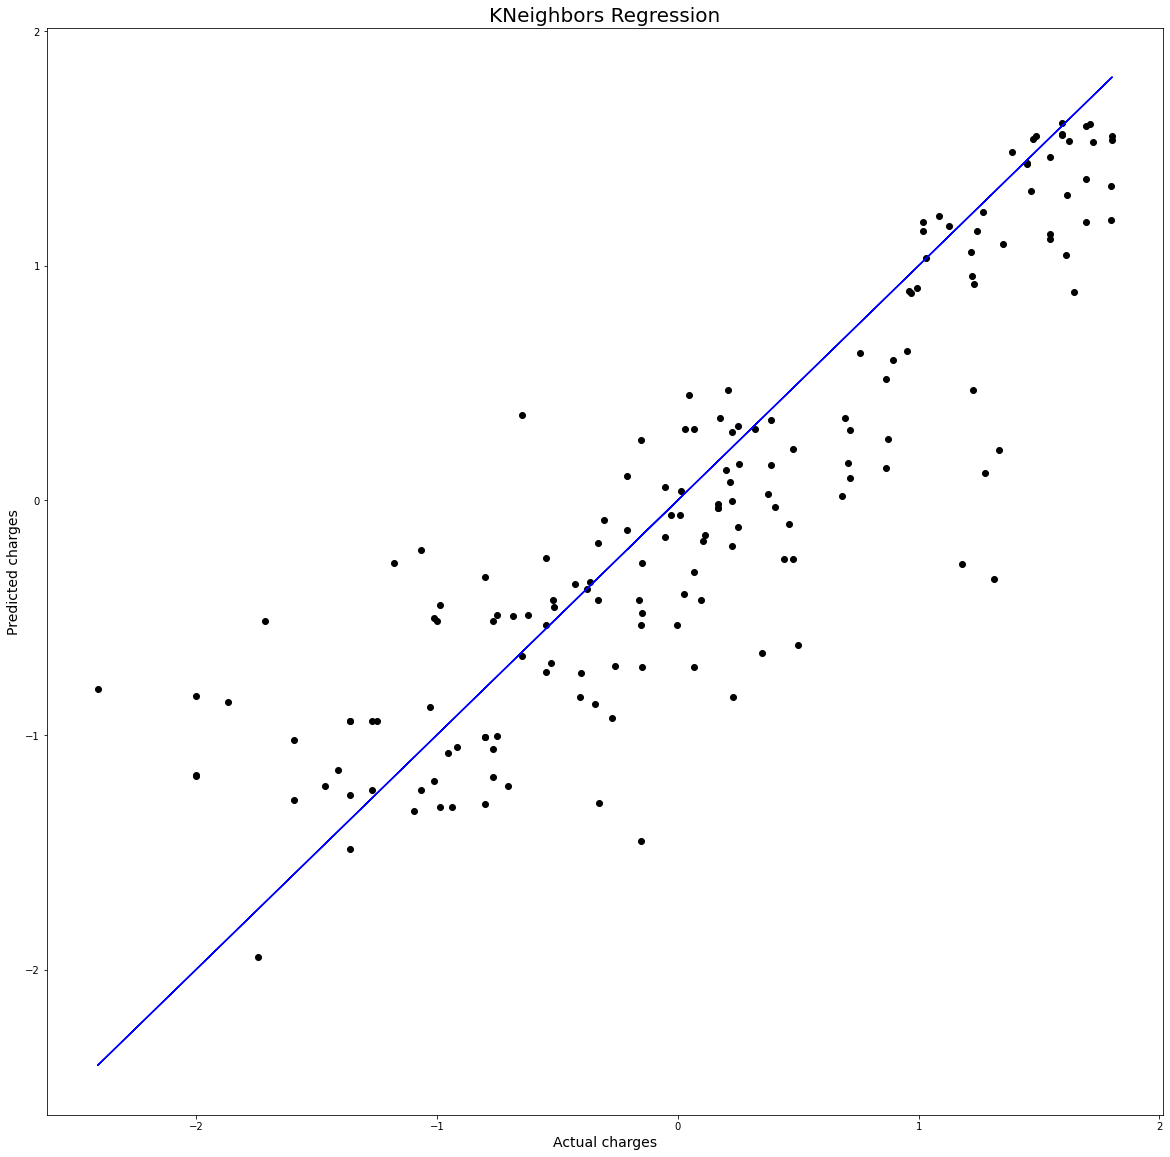

In [143]:
plt.scatter (x=y_test,y=pred_test,color='black')

plt.plot(y_test,y_test,color='b')

plt.xlabel('Actual charges' ,fontsize=14)

plt.ylabel('Predicted charges', fontsize=14)
plt.title('KNeighbors Regression' , fontsize=20)
plt. show()

### Data is scattered and is away from  best fit line

# Ensemble Technique

## Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [147]:
# Checking R2 score for Random Forest Regressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

predRF=RF.predict(x_test)
print('R2_Score:',r2_score(y_test,predRF))
print('MAE:',metrics.mean_absolute_error(y_test, predRF))
print('MSE:',metrics.mean_squared_error(y_test, predRF))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRF)))
print('cv :-' ,cross_val_score(RF,x,y,cv=5).mean())

R2_Score: 0.7964448151860206
MAE: 0.3205574452803736
MSE: 0.210086515925113
RMSE: 0.45835195638844284
cv :- 0.774651228533877


In [148]:
# Checking R2 score for GradientBoosting Regressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

# prediction
predgb=gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predgb))
print('MAE:',metrics.mean_absolute_error(y_test, predgb))
print('MSE:',metrics.mean_squared_error(y_test, predgb))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))
print('cv :-' ,cross_val_score(gb,x,y,cv=5).mean())

R2_Score: 0.818131930394856
MAE: 0.31698279963241643
MSE: 0.18770354160365602
RMSE: 0.43324766774173873
cv :- 0.7925753004555931


# Reguralization Technique

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [150]:
from sklearn.linear_model import Lasso
parameter={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}

ls= Lasso()
clf=GridSearchCV(ls,parameter)
clf.fit(x_train,y_train)

print (clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [151]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

53.001954450239985

In [152]:
pred_ls=ls.predict(x_test)

In [153]:
lss=r2_score(y_test,pred_ls)
lss*100

47.77542196484291

In [154]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

50.22403952787335

In [155]:
from sklearn.linear_model import Ridge

parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
xx=GridSearchCV(rd,parameters)
xx.fit(x_train,y_train)
print(xx.best_params_)

{'alpha': 10, 'solver': 'lsqr'}


In [156]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
rd_score_training = rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)
rd_score_training*100

53.0966207756872

In [157]:
pred_rd=rd.predict(x_test)

In [158]:
rdd=r2_score(y_test,pred_rd)
rdd*100

47.45177936960149

In [159]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

50.365381399210406

<h2 style='text-align:center;font-size:30px;background-color:white;border:30px;color:black'> *Now Lets consider model which Model should we go for as a final model* <h2>

In [160]:
mm=pd.DataFrame([["LR","50%"],["DT","76%"],["KNN","76%"],["RF","80%"],["GB","82%"],["LS","47%"],["RD","47%"]],
                    columns=["Model_Name","R2_SCORE"])

mm

,Model_Name,R2_SCORE
0,LR,50%
1,DT,76%
2,KNN,76%
3,RF,80%
4,GB,82%
5,LS,47%
6,RD,47%


#### Here we can see that gradient boost is performing the best So we will do Hyper parameter tuning on This on

In [161]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [166]:
#Gradient Boosting Regressor
parameters = {'criterion':['mse', 'friedman_mse'],
             'loss':['squared_error', 'huber', 'quqntile'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6,7,8]}

In [167]:
gg=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [168]:
gg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'loss': ['squared_error', 'huber', 'quqntile'],
                         'max_depth': [2, 3, 4, 6, 7, 8],
                         'n_estimators': [0, 200]})

In [169]:
gg.best_params_

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_depth': 2,
 'n_estimators': 200}

In [171]:
gbr = GradientBoostingRegressor(criterion='friedman_mse', max_depth=2, loss='huber', n_estimators=200)
gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predgb)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.432851067392134
R2_Score: 81.73373015686533


# Our model is performing 81% which is good ,Now we will save our final model

# Save the Model

In [172]:
#Saving the model using .pkl
import joblib
joblib.dump(gbr,"GPP_project.pkl")

['GPP_project.pkl']

# Prediction

In [173]:
#Loading the saved model
aa=joblib.load("GPP_project.pkl")


In [174]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([-0.44734723, -0.00422893,  0.47545668,  1.02473151, -0.64209156,
        1.43557286, -0.36494933, -0.40595364,  1.50338242,  0.19116304,
       -0.39617182, -0.52026615, -1.58429213, -0.83197998, -0.60517212,
       -0.71214541, -0.9224172 , -0.61053383,  0.36228871,  0.72654942,
       -0.47994867,  0.47633188,  1.00899497, -0.82985171,  1.21757878,
       -0.18483952, -0.6773342 , -0.70309933, -1.281555  , -0.83843434,
       -0.60046135,  0.67003845, -0.34007315, -0.39834114, -0.22040157,
        0.91401767,  1.54592615,  1.58980653,  0.13875701,  0.52050913,
       -1.31691775, -1.04421742,  0.42530084,  1.0502105 ,  1.44346115,
        1.58564092, -0.58544278,  0.73970222,  0.21661149,  0.3628585 ,
        0.47223099, -0.93981267,  0.22731217,  1.31973467,  0.50642301,
       -1.40410054, -0.89382982,  0.12984737,  0.94853769, -0.6773342 ,
       -0.74481977,  1.41727502,  0.05290383,  1.00334316,  0.23404789,
       -0.70309933, -1.35169451, -1.21450802,  1.41508983, -0.61

In [175]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
Predicted,-0.447347,-0.004229,0.475457,1.024732,-0.642092,1.435573,-0.364949,-0.405954,1.503382,0.191163,-0.396172,-0.520266,-1.584292,-0.831980,-0.605172,-0.712145,-0.922417,-0.610534,0.362289,0.726549,-0.479949,0.476332,1.008995,-0.829852,1.217579,-0.184840,-0.677334,-0.703099,-1.281555,-0.838434,-0.600461,0.670038,-0.340073,-0.398341,-0.220402,0.914018,1.545926,1.589807,0.138757,0.520509,-1.316918,-1.044217,0.425301,1.050211,1.443461,1.585641,-0.585443,0.739702,0.216611,0.362859,0.472231,-0.939813,0.227312,1.319735,0.506423,-1.404101,-0.893830,0.129847,0.948538,-0.677334,-0.744820,1.417275,0.052904,1.003343,0.234048,-0.703099,-1.351695,-1.214508,1.415090,-0.610534,-0.837160,-0.136420,-0.596646,0.130650,1.521330,-1.437298,-0.158096,0.285429,-0.649107,0.882867,0.292315,-0.520266,1.180170,1.000678,-0.922417,-0.748441,-0.720495,-0.922417,0.803185,0.273454,1.587277,1.645487,-0.870011,0.829208,-0.049983,1.074745,-1.047887,1.131977,0.219716,-0.909361,1.009715,-0.829852,-1.149712,-0.413052,-0.610534,0.800359,0.992687,1.119968,-0.520266,1.348541,-0.438501,-0.610534,0.229796,0.965764,-0.610534,0.946057,1.385603,-0.690043,0.450521,1.037839,0.506574,0.080097,-0.222894,-0.610534,-1.347159,-1.263199,0.249856,-0.703099,-1.529075,-0.578265,0.214613,-0.386858,-0.610534,-0.397743,0.843738,1.540582,0.834483,-0.578265,1.211666,-0.335855,-0.390528,0.427201,1.017374,-0.335855,-0.737563,-0.032669,0.212069,-0.922417,1.389049,1.272581,1.559033,-0.610534,-0.807588,-0.587353,-0.358119,-0.610534,-1.311592,-0.618747,-0.581935,0.125056,0.729433,0.369330,0.906321,-0.712145,0.119505,1.533889,-0.368264
Original,-0.208739,-0.052793,0.166808,1.017351,-0.765406,1.624510,-0.151629,-0.029799,1.593943,-0.208739,0.068119,-0.343310,-1.741532,-0.765406,-0.986848,-0.953267,-1.409182,0.223779,0.348556,0.223779,-0.682316,0.201711,0.966817,-1.066424,1.467242,-0.364529,-0.511655,-1.250319,-0.526528,0.228086,-0.646365,1.227432,1.181243,-0.259182,0.011042,1.544361,1.449278,1.693759,0.068119,0.463936,-1.095681,-1.997998,0.895888,1.332487,1.693759,1.803921,0.011844,0.865390,0.322238,0.442488,0.385748,-0.986848,0.207314,1.725143,0.166808,-0.151629,-0.272558,0.030746,0.758600,-1.867151,-1.359056,1.474753,0.405341,0.716499,0.716499,-1.270453,-1.593337,-0.799646,1.800543,-0.515863,-1.066424,0.103066,-0.799646,0.218347,1.593943,-1.359056,-0.329608,0.223779,-1.012135,1.693759,0.174862,-0.548499,1.240913,0.958797,-0.799646,-0.917214,-0.548499,-0.702688,1.312436,0.046008,1.593943,1.803921,-0.799646,0.992696,-0.052793,1.085004,-0.325116,1.797628,-0.151629,-0.934949,1.266119,-1.270453,-1.359056,-0.376683,-1.179776,1.125664,1.645579,1.613716,-1.997998,1.616662,0.068119,-0.999348,0.694673,1.219335,-0.147310,1.351647,1.544361,-0.749048,0.864584,1.231434,0.250144,0.253733,-0.329608,0.095570,-1.012135,-1.593337,0.681130,-1.359056,-2.407959,-0.749048,0.373637,0.477209,-0.162581,-0.147310,0.385748,1.709693,1.221777,-0.548499,0.950651,0.027642,0.498618,0.707877,1.017351,-0.407005,-1.027875,-0.307509,1.277183,-1.464182,1.388342,1.544361,1.489452,-0.147310,-0.765406,-0.646365,-0.428195,-1.714005,-1.997998,0.113123,-0.401834,0.477209,0.872587,0.166808,1.029255,-0.620222,0.250144,1.449278,-0.001136


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

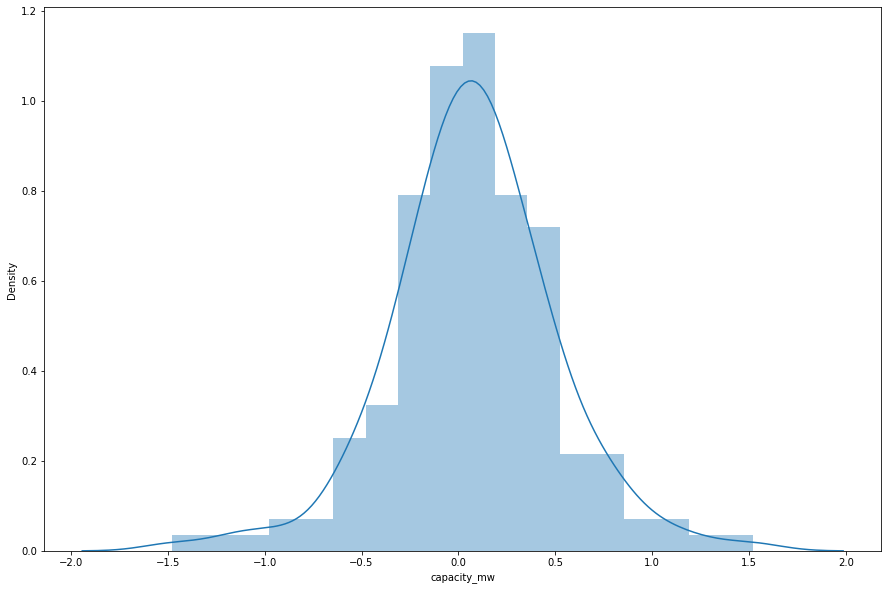

In [177]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

# This graph is showing how accurate my predection is and which is 81% accurated and is pretty good

# Regression Project completes here

# ----------------------------------------------------

# ------------------------------------------------------------------------

# -----------------------------------------------------------------------------------------------------

<h2 style='text-align:center;font-size:40px;background-color:green;border:40px;color:white'> * Classification Project Starts Here * <h2>

# In classification we are taking Primary_fuel as Target variable

In [91]:
df_new

,capacity_mw,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,73.2407,6,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,74.6090,1,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,69.3732,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,77.3568,1,2016.0,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,78.1654,6,2001.0,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,75.5811,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,73.7477,1,2001.0,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [162]:
# Let's define primary_fuel as Fuel_Type to make dataset easy to acknowledge
df_new.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [163]:
df_new.columns

Index(['capacity_mw', 'longitude', 'Fuel_Type', 'commissioning_year', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [164]:
## Spliting dependent and independent feature
x=df_new.loc [:,df_new.columns != 'Fuel_Type']


In [165]:
y=df_new.loc[:,'Fuel_Type']


In [166]:
x.shape

(831, 10)

### Outliers has already been removed before lets once check for skewness

In [167]:
x.skew()

capacity_mw            0.011275
longitude             -0.000024
commissioning_year    -0.320212
source                 1.778820
geolocation_source    -2.098153
generation_gwh_2014    0.225137
generation_gwh_2015    0.159738
generation_gwh_2016    0.145541
generation_gwh_2017    0.122280
generation_gwh_2018    0.128320
dtype: float64

##### So there is no skewness

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

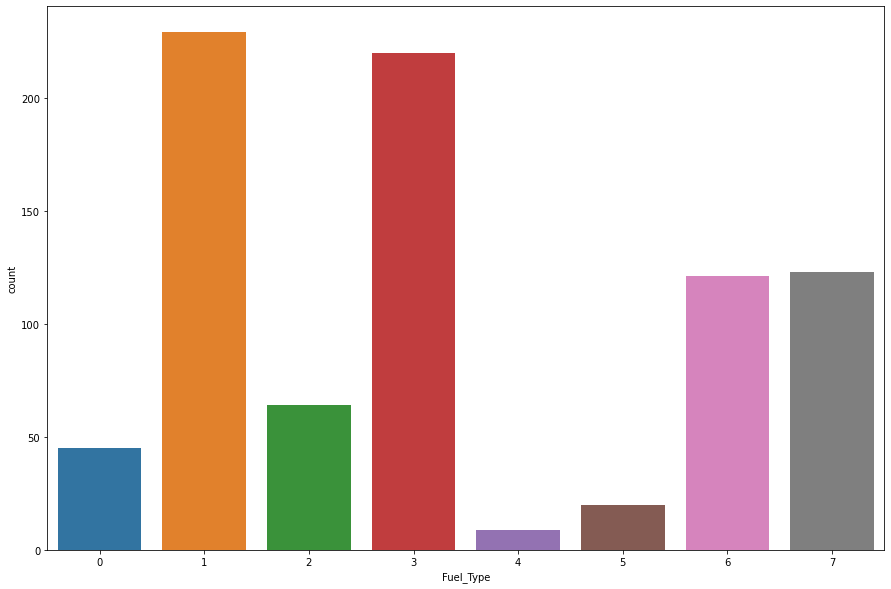

In [169]:
## lets check is our target variable is balanced or not
plt.figure(figsize=(15,10))
sns.countplot(y)

##### So it it clear that our target variable is imbalanced.. so lets first balance the data

# Balancing the dataset

In [170]:
from imblearn.over_sampling import SMOTE

In [171]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [173]:
y.value_counts()

6    229
1    229
7    229
2    229
3    229
0    229
5    229
4    229
Name: Fuel_Type, dtype: int64

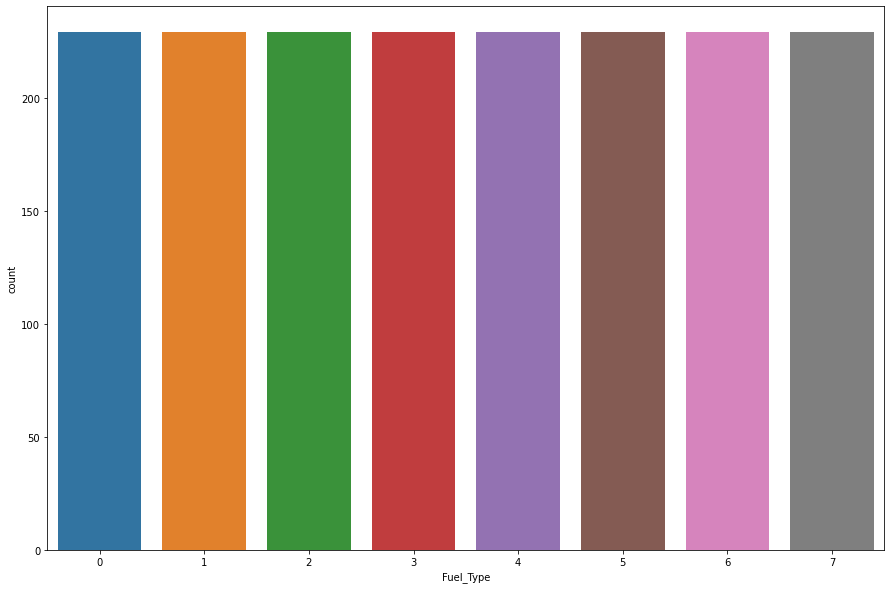

In [176]:
plt.figure(figsize=(15,10))
sns.countplot(y)
plt.show()

##### Now target variable is balanced

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier


### Model Training

In [179]:
max_acc=0
max_rand=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    preddt = dt.predict(x_test)
    acc=accuracy_score(y_test, preddt)
    if acc>max_acc:
        max_acc=acc
        max_rand=i
print("Best accuracy is ",max_acc," on Random_state ",max_rand)

print('cv :-' ,cross_val_score(dt,x,y,cv=5).mean())

Best accuracy is  0.8981818181818182  on Random_state  147
cv :- 0.8695597147153855


## Here i am getting 90% accuracy on random state 147

In [180]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)

#Prediction
predsv = sv.predict(x_test)

print(accuracy_score(y_test, predsv))
print(confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

print('cv :-' ,cross_val_score(sv,x,y,cv=5).mean())

0.3509090909090909
[[48  0  0  5  0  0 18  2]
 [ 8  0  0 27 24  0  7  3]
 [ 2  0  0 67  3  0  3  0]
 [ 0  0  0 56  3  0  0  0]
 [ 5  0  0 15 54  0  0  0]
 [ 5  0  0 36  0  0 17  0]
 [31  0  0  5  0  0 35  8]
 [ 0  0  0 63  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.48      0.66      0.56        73
           1       0.00      0.00      0.00        69
           2       0.00      0.00      0.00        75
           3       0.20      0.95      0.34        59
           4       0.64      0.73      0.68        74
           5       0.00      0.00      0.00        58
           6       0.44      0.44      0.44        79
           7       0.00      0.00      0.00        63

    accuracy                           0.35       550
   macro avg       0.22      0.35      0.25       550
weighted avg       0.24      0.35      0.27       550

cv :- 0.3979437471151412


### Here i am getting 35% result which is very less as compared to other

In [182]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)

#Prediction
predkn = kn.predict(x_test)

print(accuracy_score(y_test, predkn))
print(confusion_matrix(y_test, predkn))
print(classification_report(y_test,predkn))

print('cv :-' ,cross_val_score(kn,x,y,cv=5).mean())

0.8254545454545454
[[61  4  0  0  0  8  0  0]
 [ 6 38  7  3  6  4  4  1]
 [ 3  2 64  1  2  2  0  1]
 [ 0  7  9 43  0  0  0  0]
 [ 3  0  2  0 69  0  0  0]
 [ 5  1  5  1  0 43  2  1]
 [ 3  1  0  0  0  0 73  2]
 [ 0  0  0  0  0  0  0 63]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        73
           1       0.72      0.55      0.62        69
           2       0.74      0.85      0.79        75
           3       0.90      0.73      0.80        59
           4       0.90      0.93      0.91        74
           5       0.75      0.74      0.75        58
           6       0.92      0.92      0.92        79
           7       0.93      1.00      0.96        63

    accuracy                           0.83       550
   macro avg       0.83      0.82      0.82       550
weighted avg       0.83      0.83      0.82       550

cv :- 0.8029466505859055


### Here i am getting 83% result which is good

# Ensembel Technique

In [183]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

#Prediction
predrf = rfc.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('cv :-' ,cross_val_score(rfc,x,y,cv=5).mean())

0.9090909090909091
[[72  0  0  0  0  1  0  0]
 [ 5 52  3  6  3  0  0  0]
 [ 0  1 70  3  1  0  0  0]
 [ 0  9  6 43  0  1  0  0]
 [ 0  3  0  0 71  0  0  0]
 [ 0  1  2  3  0 51  0  1]
 [ 1  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 63]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.79      0.75      0.77        69
           2       0.86      0.93      0.90        75
           3       0.78      0.73      0.75        59
           4       0.95      0.96      0.95        74
           5       0.96      0.88      0.92        58
           6       1.00      0.99      0.99        79
           7       0.98      1.00      0.99        63

    accuracy                           0.91       550
   macro avg       0.91      0.90      0.90       550
weighted avg       0.91      0.91      0.91       550

cv :- 0.913759473503968


### Here i am getting 91% as result

In [184]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)

#Prediction
predbc = bc.predict(x_test)

print(accuracy_score(y_test, predbc))
print(confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

0.8836363636363637
[[70  2  0  0  0  1  0  0]
 [ 5 49  5  8  2  0  0  0]
 [ 0  3 65  6  0  1  0  0]
 [ 0 10  9 39  0  1  0  0]
 [ 0  2  1  0 71  0  0  0]
 [ 0  3  1  2  0 51  0  1]
 [ 1  0  0  0  0  0 78  0]
 [ 0  0  0  0  0  0  0 63]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        73
           1       0.71      0.71      0.71        69
           2       0.80      0.87      0.83        75
           3       0.71      0.66      0.68        59
           4       0.97      0.96      0.97        74
           5       0.94      0.88      0.91        58
           6       1.00      0.99      0.99        79
           7       0.98      1.00      0.99        63

    accuracy                           0.88       550
   macro avg       0.88      0.88      0.88       550
weighted avg       0.88      0.88      0.88       550



### Here i am getting 88% as result

#### I am choosing Random Forest Classifier because it has best result

# Hyperparameter Tuning

In [186]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [187]:
#RandomForestClassifier
parameters = {'bootstrap' : [True, False],'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[2,200],
             'max_depth':[2,3,4,6,7,8,10,12,14,16,18,20,22,24,26,28,30]}

In [188]:
qq=GridSearchCV(RandomForestClassifier(),parameters,cv=5)


In [189]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 200]})

In [190]:
qq.best_params_

{'bootstrap': False,
 'max_depth': 24,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [191]:
rfc = RandomForestClassifier(bootstrap = False,max_depth=24, max_features='sqrt', n_estimators=200)
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

RMSE value: 0.7135060680126757
Accuracy_Score :->  90.72727272727272


# Soo Here my random forest classifier in hyperparameter tuning ,the accuracy is 91%

# Save The Model

In [192]:
#Saving the model using .pkl
import joblib
joblib.dump(rfc,"GPP_Classif.pkl")

['GPP_Classif.pkl']

In [193]:
#Loading the saved model
aa=joblib.load("GPP_Classif.pkl")

In [194]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([4, 4, 0, 0, 6, 1, 7, 1, 7, 2, 4, 2, 0, 6, 0, 4, 4, 5, 4, 1, 1, 1,
       7, 7, 0, 5, 4, 6, 2, 7, 0, 7, 7, 0, 7, 1, 4, 2, 6, 1, 3, 3, 4, 6,
       1, 1, 6, 3, 4, 0, 3, 6, 6, 2, 0, 0, 4, 3, 3, 2, 3, 4, 4, 6, 5, 2,
       1, 7, 5, 6, 5, 2, 7, 0, 2, 1, 4, 2, 2, 3, 5, 0, 5, 0, 3, 6, 0, 2,
       7, 0, 0, 7, 7, 1, 0, 5, 2, 4, 2, 3, 6, 4, 6, 2, 7, 6, 7, 4, 4, 1,
       0, 5, 7, 6, 1, 5, 4, 5, 6, 4, 2, 7, 5, 6, 0, 1, 5, 0, 3, 1, 4, 5,
       3, 5, 3, 3, 7, 0, 0, 7, 7, 5, 5, 6, 6, 4, 1, 0, 4, 6, 3, 0, 0, 2,
       2, 3, 4, 6, 0, 6, 2, 1, 5, 1, 6, 5, 3, 5, 2, 6, 6, 6, 7, 5, 1, 5,
       7, 7, 3, 0, 2, 2, 5, 6, 5, 2, 4, 4, 6, 0, 6, 7, 4, 1, 0, 4, 2, 0,
       1, 6, 5, 5, 3, 2, 1, 7, 6, 3, 5, 0, 3, 0, 6, 6, 6, 7, 1, 4, 2, 2,
       3, 0, 6, 5, 1, 4, 4, 7, 2, 3, 5, 0, 4, 0, 5, 0, 4, 2, 1, 2, 4, 6,
       6, 0, 4, 0, 7, 1, 2, 3, 6, 6, 6, 2, 7, 7, 7, 0, 3, 2, 4, 6, 0, 1,
       1, 1, 0, 1, 0, 2, 2, 4, 6, 0, 3, 2, 5, 6, 2, 0, 1, 1, 2, 7, 3, 4,
       4, 1, 4, 0, 2, 5, 2, 3, 6, 2, 1, 1, 0, 4, 0,

In [195]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549
Predicted,4,4,0,0,6,1,7,1,7,2,4,2,0,6,0,4,4,5,4,1,1,1,7,7,0,5,4,6,2,7,0,7,7,0,7,1,4,2,6,1,3,3,4,6,1,1,6,3,4,0,3,6,6,2,0,0,4,3,3,2,3,4,4,6,5,2,1,7,5,6,5,2,7,0,2,1,4,2,2,3,5,0,5,0,3,6,0,2,7,0,0,7,7,1,0,5,2,4,2,3,6,4,6,2,7,6,7,4,4,1,0,5,7,6,1,5,4,5,6,4,2,7,5,6,0,1,5,0,3,1,4,5,3,5,3,3,7,0,0,7,7,5,5,6,6,4,1,0,4,6,3,0,0,2,2,3,4,6,0,6,2,1,5,1,6,5,3,5,2,6,6,6,7,5,1,5,7,7,3,0,2,2,5,6,5,2,4,4,6,0,6,7,4,1,0,4,2,0,1,6,5,5,3,2,1,7,6,3,5,0,3,0,6,6,6,7,1,4,2,2,3,0,6,5,1,4,4,7,2,3,5,0,4,0,5,0,4,2,1,2,4,6,6,0,4,0,7,1,2,3,6,6,6,2,7,7,7,0,3,2,4,6,0,1,1,1,0,1,0,2,2,4,6,0,3,2,5,6,2,0,1,1,2,7,3,4,4,1,4,0,2,5,2,3,6,2,1,1,0,4,0,5,1,3,0,6,0,6,6,2,6,6,2,7,1,2,6,7,2,1,0,6,2,4,5,4,7,2,2,2,2,0,2,7,1,0,4,7,4,2,6,3,5,2,2,4,1,4,0,3,4,2,2,4,4,6,7,4,6,0,6,1,7,3,6,2,0,7,4,4,4,3,5,3,3,6,0,2,4,7,1,4,0,4,6,1,7,6,2,6,7,1,1,4,4,0,1,4,1,7,7,1,3,1,7,2,6,2,2,1,1,2,6,1,7,3,4,3,6,4,3,1,2,7,1,6,2,6,3,5,2,0,0,7,0,6,0,3,0,7,7,1,4,6,4,6,0,0,2,0,0,1,6,3,2,2,6,0,6,5,2,3,7,0,7,6,1,4,0,2,6,5,3,2,6,0,5,2,7,2,1,3,4,6,7,7,1,0,1,3,1,3,3,0,7,2,2,2,1,4,7,3,0,1,3,7,4,5,5,5,4,5,1,2,2,0,1,0,7,1,1,6,5,1,5,7,3,1,6,7,7,3,1,4,1,0,1,5,5,5,5,5,4,2,3,6,3,7,2,1
Original,4,4,0,0,6,3,7,1,7,2,1,2,0,6,0,4,4,5,4,3,1,1,7,7,0,5,4,6,2,7,1,7,7,0,7,2,4,2,6,4,3,3,4,6,1,1,6,3,4,0,3,6,6,1,0,0,4,3,1,2,3,4,4,6,5,2,0,7,5,6,5,2,7,0,2,3,4,2,2,3,5,1,5,0,3,6,0,2,7,0,0,7,7,3,0,5,2,4,2,3,6,4,6,2,7,6,7,4,4,3,0,5,7,6,1,5,4,5,6,4,2,7,5,6,0,3,5,0,3,1,4,5,3,5,3,3,7,0,0,7,7,5,5,6,6,4,3,0,4,6,5,0,0,2,2,3,4,6,0,6,2,1,5,1,6,5,2,5,2,6,6,6,7,5,1,5,7,7,5,0,2,2,5,6,5,2,4,4,6,0,6,7,4,1,0,4,2,0,1,6,5,5,3,2,1,7,6,3,5,0,3,0,6,6,6,7,1,4,2,2,3,0,6,5,1,4,4,7,2,1,3,0,4,0,5,0,4,2,1,2,4,6,6,0,4,0,7,1,2,5,6,6,6,2,7,7,7,0,2,2,4,6,0,1,4,1,0,1,0,2,2,4,6,0,3,2,5,6,2,0,1,1,3,7,3,4,4,1,4,0,2,5,2,3,6,2,1,1,0,4,0,5,3,3,0,6,0,6,6,3,6,6,2,7,1,2,6,7,2,1,0,6,2,4,5,4,7,2,2,2,2,0,5,7,1,0,4,7,4,2,6,2,5,2,2,4,5,4,0,3,4,3,2,4,4,6,7,4,6,0,6,1,7,3,6,2,0,7,4,4,4,3,5,3,3,6,0,2,4,7,4,4,0,4,6,1,7,6,2,6,7,1,1,4,1,

# ^^^^^^^^^^^Project Completes Here^^^^^^^^^^

# --------------------------------------------------------------------------------------------